### Academic Integrity and Learning Statement

By submitting my work, I confirm that:

1. The code, analysis, and documentation in this notebook are my own work and reflect my own understanding.
2. I am prepared to explain all code and analysis included in this submission.

If I used assistance (e.g., AI tools, tutors, or other resources), I have:
- Clearly documented where and how external tools or resources were used in my solution.
If I used assistance (e.g., AI tools, tutors, or other resources), I have:
- Included a copy of the interaction (e.g., AI conversation or tutoring notes) in an appendix.

I acknowledge that:

- I may be asked to explain any part of my code or analysis during evaluation.
- Misrepresenting assisted work as my own constitutes academic dishonesty and undermines my learning.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

### 04. Part 2 - House prices

In this second part, you will work on the house prices dataset assembled and published by Dean De Cock. It’s a set of 2,930 observations with 82 attributes each. The goal is to go through all the main steps of a data science project i.e. preparing the data, exploring the data (EDA) and modeling. In the modeling part, you will use the first 2,430 ones (i.e. training set) to fit and evaluate different models and use them to make predictions for the last 500 ones (i.e. test set). Note that we don’t provide the prices for those 500 houses, your task is to estimate them.

A quick look at the data
Here are the first five entries from house-prices.csv


You can find a detailed description of each variable in the documentation.txt file, but there are a few things to know.

The Order and PID variables are identifiers. They are not useful to predict house prices.
The variables are not necessarily encoded consistently. For instance, MS SubClass (the type of dwelling) and MS Zoning (zoning classification) are both categorical variables, but one is encoded with numerical values and the other with short labels.
#The data isn’t clean: there are incorrect and missing values, outliers and inconsistencies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

C:\Users\Sartklar\miniconda3\envs\adsml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


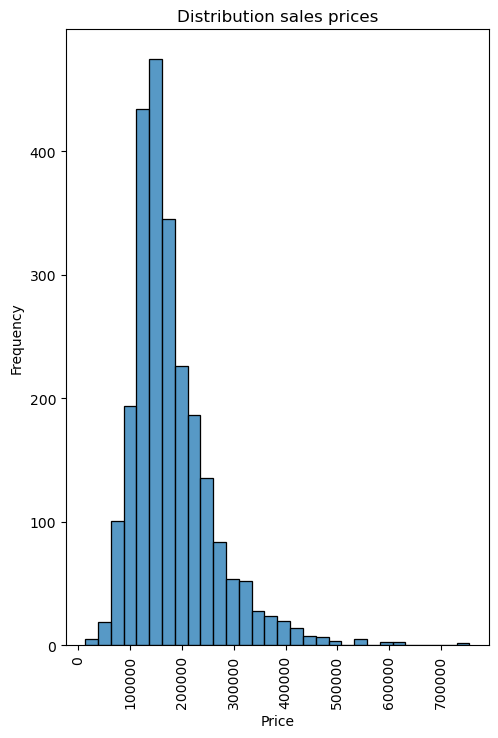

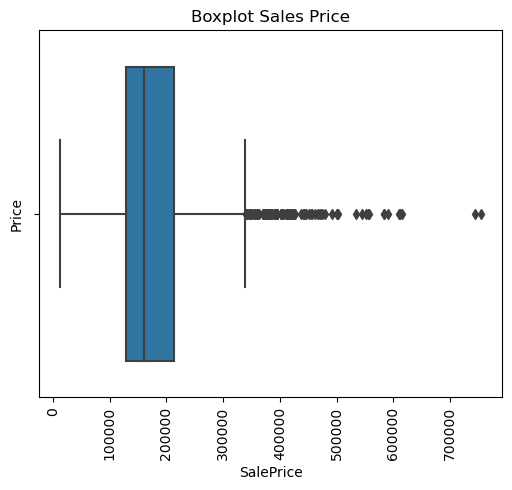

C:\Users\Sartklar\AppData\Local\Temp\ipykernel_12944\994774646.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x_trained = x_trained.fillna(x_trained.median())
C:\Users\Sartklar\AppData\Local\Temp\ipykernel_12944\994774646.py:64: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data = test_data.fillna(test_data.median())



Final form of the X trained: (2430, 275)

Final for the Test data: (500, 275)
split data 80-20

Trained data x: 1944
Trained data y: 1944
Linear regression:
Mean squared error:
 40082.49
R²:
 0.74
Random Forest:
Mean squared error:
 25286.25
R²:
 0.8963
Huber regression model:
Mean squared error:
 79143.68
R²:
 -0.02
Final price prediction:
   id_house  predict_price
0         1      178573.18
1         2      135916.00
2         3      291541.30
3         4      135969.30
4         5       93384.72
5         6      180234.78
6         7       60035.58
7         8      139834.82
8         9      180102.00
9        10      109076.07
Stadistics of Predictions:
Max price predicted:470739.86
Minimum price predicted:57383.55
Mean price predicted:183097.00146


In [59]:
#here I am loading the data, in this case  the source files as csv

train_data = pd.read_csv('house-prices.csv')
test_data = pd.read_csv('house-prices-test.csv')


#Here I am doing some exploration of the data


print(f"Train data info:\n {train_data.info()}")



#Here I identify the NAN values and I sum them


missing_trained_values = train_data.isna().sum()
print("\nMissing trained values:\n", missing_trained_values[missing_trained_values > 0])



#here the is a visualisation of distribution of the objective variable 

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.histplot(train_data['SalePrice'], bins = 30)
plt.title("Distribution sales prices")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Price")

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(train_data['SalePrice'])
plt.title("Boxplot Sales Price")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.tight_layout()
plt.show()


#Here the interpretation of the visualization

#Histplot: The prices go up to 12.000 until 750.000. The majority of the price houses are between 100.000 and 300.000 dollars 
#Boxtplot: The median is 160.000. Q1 is 130.000 and Q3 is 215.000 dollars
#Outliers: The outliers of the boxplot and histplot are above 400.000 dollars.




#here I separate the objective variable


x_trained = train_data.drop('SalePrice', axis = 1)
y_trained = train_data['SalePrice']



#Now in this part the data will prepared to be used, to train the model

x_trained = x_trained.fillna(x_trained.median())
x_trained = x_trained.fillna('Unknown')

test_data = test_data.fillna(test_data.median())
test_data = test_data.fillna('Unknown')


x_trained = pd.get_dummies(x_trained)
test_data = pd.get_dummies(test_data)

#now it will get aligned

similar_columns = x_trained.columns.intersection(test_data.columns)
x_trained = x_trained[similar_columns]
test_data = test_data[similar_columns]


print("\nFinal form of the X trained:", x_trained.shape)
print("\nFinal for the Test data:", test_data.shape)

#Here I split data into 80-20 for training and testing purposes

x_trained_split, x_values, y_trained_split, y_values = train_test_split(x_trained, y_trained, test_size = 0.2, random_state = 42)
print("split data 80-20\n")
print(f"Trained data x: {x_trained_split.shape[0]}")
print(f"Trained data y: {y_trained_split.shape[0]}")

#Here we train the model
linear_model = LinearRegression()
linear_model.fit(x_trained_split, y_trained_split)

  
#and here I add the predictions with outliers
linear_model_predict = linear_model.predict(x_values) #(mental note) x_values and the y_values save the 20% and the split values saves the 80%.
#The x_trained_split and the y_trained_split is being used to train the models and the values are being used to evaluete the models.Training is when the models learns from the data to find patterns and evaluate is 
#when I check the correctnes of the learning path of the model.

#the two lines below are metrics to mesure mean squared error and the squarred error loss with outliers

mse_linear_model = np.sqrt(mean_squared_error(y_values, linear_model_predict)) #(mental note): I use sqrt to return to the original units that I am working, otherwise the result would elevated to square.
r2_linear_model = r2_score(y_values, linear_model_predict)


print("Linear regression:")
print(f"Mean squared error:\n {mse_linear_model.round(2)}")      
print(f"R²:\n {r2_linear_model.round(2)}")

random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_model.fit(x_trained_split, y_trained_split)

random_forest_model_predict = random_forest_model.predict(x_values)


mse_random_forest_model = np.sqrt(mean_squared_error(y_values, random_forest_model_predict))
r2_random_forest_model = r2_score(y_values, random_forest_model_predict)


print("Random Forest:")
print(f"Mean squared error:\n {mse_random_forest_model.round(2)}")      
print(f"R²:\n {r2_random_forest_model.round(4)}")

#Here we train the model
huber_model = HuberRegressor(epsilon=1.35, max_iter = 100)
huber_model.fit(x_trained_split, y_trained_split)

#and here I add the predictions

huber_model_predict = huber_model.predict(x_values)

#the two lines below are metrics to mesure mean absolute error and the squarred error loss

mse_huber_model = np.sqrt(mean_squared_error(y_values, huber_model_predict))
r2_huber_model = r2_score(y_values, huber_model_predict)


print("Huber regression model:")
print(f"Mean squared error:\n {mse_huber_model.round(2)}")      
print(f"R²:\n {r2_huber_model.round(2)}")


final_prediction_random_forest = random_forest_model.predict(test_data)

predictions_df = pd.DataFrame({
    'id_house': range(1, len(final_prediction_random_forest) +1),
    'predict_price': final_prediction_random_forest})

print("Final price prediction:")
print(predictions_df.head(10))


print("Stadistics of Predictions:")
print(f"Max price predicted:{predictions_df['predict_price'].max()}")
print(f"Minimum price predicted:{predictions_df['predict_price'].min()}")
print(f"Mean price predicted:{predictions_df['predict_price'].mean()}")






### Exploratory data analysis and data cleaning
You should gain a comprehensive overview over the data by exploring and visualising the data in various ways, including the distribution of the feature values in individual features. Throughout you should comment on your observation, discuss how they might affect later steps in the project (e.g. insights that help with feature engineering and data preprocessing for the modeling part) and state which decisions you take as a result.

You should use your EDA to identify issues with the data that require data cleaning. For instance

Find and handle incorrect, missing values
Correct inconsistencies in the variables
Handle outliers
You are free to choose your preferred approach to handle each step. For instance, you might want to replace missing values with the average or the most frequent value or create a missing category. In any case, justify your choices!

Remember our overall objective is to predict the sale price. Hence it is useful to know which features might exhibit a relationship with our target, and which ones may be not? This will help us decide which features might be useful for our models, and which need additional feature engineering first. Start by exploring and visualizing the relationship between individual features and the target variables. Comment your observation and discuss their impact on the modeling part.

Don’t forget to choose appropriate visualizations and analyses depending on whether we are dealing with continuous, discrete or categorical features.

In [52]:
#here I am loading the data, in this case  the source files as csv

train_data = pd.read_csv('house-prices.csv')
test_data = pd.read_csv('house-prices-test.csv')


#Here I am doing some exploration of the data

print(f"Train dataset:\n {train_data.shape}")
print(f"Test dataset:\n {test_data.shape}")

print(f"Train data info:\n {train_data.info()}")

print(f"Types of data:\n {train_data.dtypes.value_counts}")
    


Train dataset:
 (2430, 82)
Test dataset:
 (500, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Typ

Missing values in training data:
Pool QC           2418
Misc Feature      2340
Alley             2267
Fence             1941
Fireplace Qu      1186
Lot Frontage       420
Garage Cond        138
Garage Qual        138
Garage Finish      138
Garage Yr Blt      138
Garage Type        136
Bsmt Exposure       74
BsmtFin Type 2      72
BsmtFin Type 1      71
Bsmt Qual           71
Bsmt Cond           71
Mas Vnr Area        20
Mas Vnr Type        20
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Cars          1
Garage Area          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

Percentage of missing values in training data:
Pool QC           99.51
Misc Feature      96.30
Alley             93.29
Fence             79.88
Fireplace Qu      48.81
Lot Frontage      17.28
Garage Cond        5.68
Garage Qual        5.68
Garage Finish      5.68
Garage Yr Blt      5.68
Garage Type        5.60
Bsmt Exposure      3.

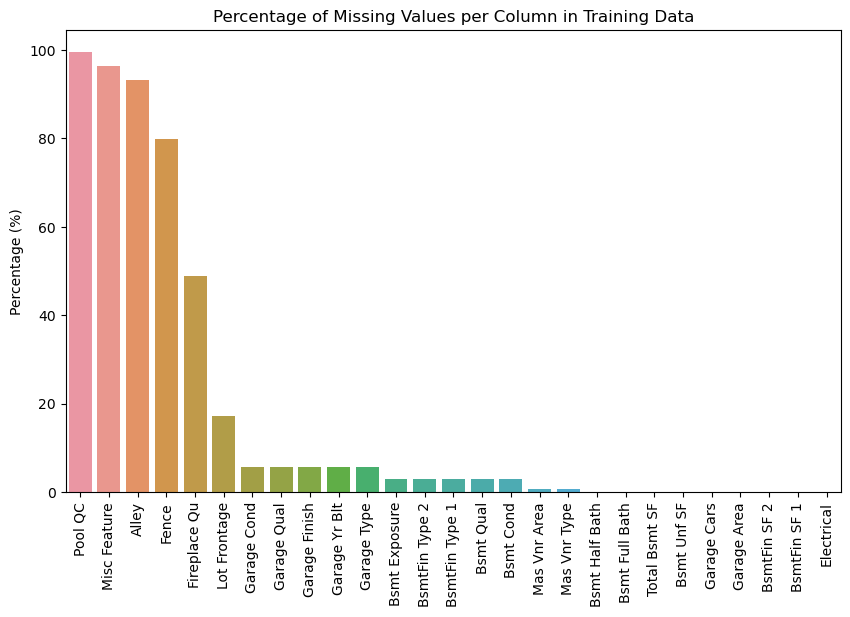

In [53]:
missing_train_data = train_data.isnull().sum()
missing_train_data = missing_train_data[missing_train_data > 0].sort_values(ascending=False)
missing_train_percent = (missing_train_data / len(train_data)) * 100

print("Missing values in training data:")
print(missing_train_data)
print("\nPercentage of missing values in training data:")
print(missing_train_percent.round(2))

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_train_percent.index, y=missing_train_percent.values)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values per Column in Training Data")
plt.ylabel("Percentage (%)")
plt.show()


In [54]:
missing_test_data = test_data.isnull().sum()
missing_test_data = missing_test_data[missing_test_data > 0].sort_values(ascending=False)
missing_test_percent = (missing_test_data / len(test_data)) * 100

print("\nMissing values in test data:")
print(missing_test_data)
print("\nPercentage of missing values in test data:")
print(missing_test_percent.round(2))


Missing values in test data:
Pool QC           499
Misc Feature      484
Alley             465
Fence             417
Fireplace Qu      236
Lot Frontage       70
Garage Type        21
Garage Yr Blt      21
Garage Finish      21
Garage Qual        21
Garage Cond        21
Bsmt Cond           9
Bsmt Exposure       9
BsmtFin Type 1      9
BsmtFin Type 2      9
Bsmt Qual           9
Mas Vnr Area        3
Mas Vnr Type        3
dtype: int64

Percentage of missing values in test data:
Pool QC           99.8
Misc Feature      96.8
Alley             93.0
Fence             83.4
Fireplace Qu      47.2
Lot Frontage      14.0
Garage Type        4.2
Garage Yr Blt      4.2
Garage Finish      4.2
Garage Qual        4.2
Garage Cond        4.2
Bsmt Cond          1.8
Bsmt Exposure      1.8
BsmtFin Type 1     1.8
BsmtFin Type 2     1.8
Bsmt Qual          1.8
Mas Vnr Area       0.6
Mas Vnr Type       0.6
dtype: float64


In [55]:
# Identify columns to drop with high missing percentage (e.g., > 50%)
cols_to_drop = missing_train_percent[missing_train_percent > 50].index.tolist()

# Drop the identified columns from both train and test datasets
train_data_cleaned = train_data.drop(columns=cols_to_drop)
test_data_cleaned = test_data.drop(columns=cols_to_drop)

print(f"Columns dropped due to high missing percentage (> 50%): {cols_to_drop}")
print(f"Shape of training data after dropping columns: {train_data_cleaned.shape}")
print(f"Shape of test data after dropping columns: {test_data_cleaned.shape}")

# Identify remaining columns with missing values
missing_train_cleaned = train_data_cleaned.isnull().sum()
missing_train_cleaned = missing_train_cleaned[missing_train_cleaned > 0].sort_values(ascending=False)

missing_test_cleaned = test_data_cleaned.isnull().sum()
missing_test_cleaned = missing_test_cleaned[missing_test_cleaned > 0].sort_values(ascending=False)

print("\nRemaining missing values in training data after dropping columns:")
print(missing_train_cleaned)
print("\nRemaining missing values in test data after dropping columns:")
print(missing_test_cleaned)

# Impute remaining missing values in numerical columns with the median
numerical_cols_with_missing_train = train_data_cleaned[missing_train_cleaned.index].select_dtypes(include=np.number).columns
for col in numerical_cols_with_missing_train:
    median_val = train_data_cleaned[col].median()
    train_data_cleaned[col].fillna(median_val, inplace=True)
    test_data_cleaned[col].fillna(median_val, inplace=True) # Apply the same median to test data

print("\nMissing values in numerical columns imputed with median.")

# Impute remaining missing values in categorical columns by creating a new category 'Missing'
categorical_cols_with_missing_train = train_data_cleaned[missing_train_cleaned.index].select_dtypes(include='object').columns
for col in categorical_cols_with_missing_train:
    train_data_cleaned[col].fillna('Missing', inplace=True)
    test_data_cleaned[col].fillna('Missing', inplace=True) # Apply the same imputation to test data

print("Missing values in categorical columns imputed with 'Missing'.")

# Verify that there are no more missing values
print("\nMissing values in training data after imputation:")
print(train_data_cleaned.isnull().sum().sum())
print("Missing values in test data after imputation:")
print(test_data_cleaned.isnull().sum().sum())

Columns dropped due to high missing percentage (> 50%): ['Pool QC', 'Misc Feature', 'Alley', 'Fence']
Shape of training data after dropping columns: (2430, 78)
Shape of test data after dropping columns: (500, 77)

Remaining missing values in training data after dropping columns:
Fireplace Qu      1186
Lot Frontage       420
Garage Qual        138
Garage Finish      138
Garage Yr Blt      138
Garage Cond        138
Garage Type        136
Bsmt Exposure       74
BsmtFin Type 2      72
BsmtFin Type 1      71
Bsmt Qual           71
Bsmt Cond           71
Mas Vnr Area        20
Mas Vnr Type        20
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Electrical           1
Bsmt Unf SF          1
Garage Cars          1
Garage Area          1
BsmtFin SF 2         1
Total Bsmt SF        1
dtype: int64

Remaining missing values in test data after dropping columns:
Fireplace Qu      236
Lot Frontage       70
Garage Type        21
Garage Yr Blt      21
Garage Finish      21
Garag

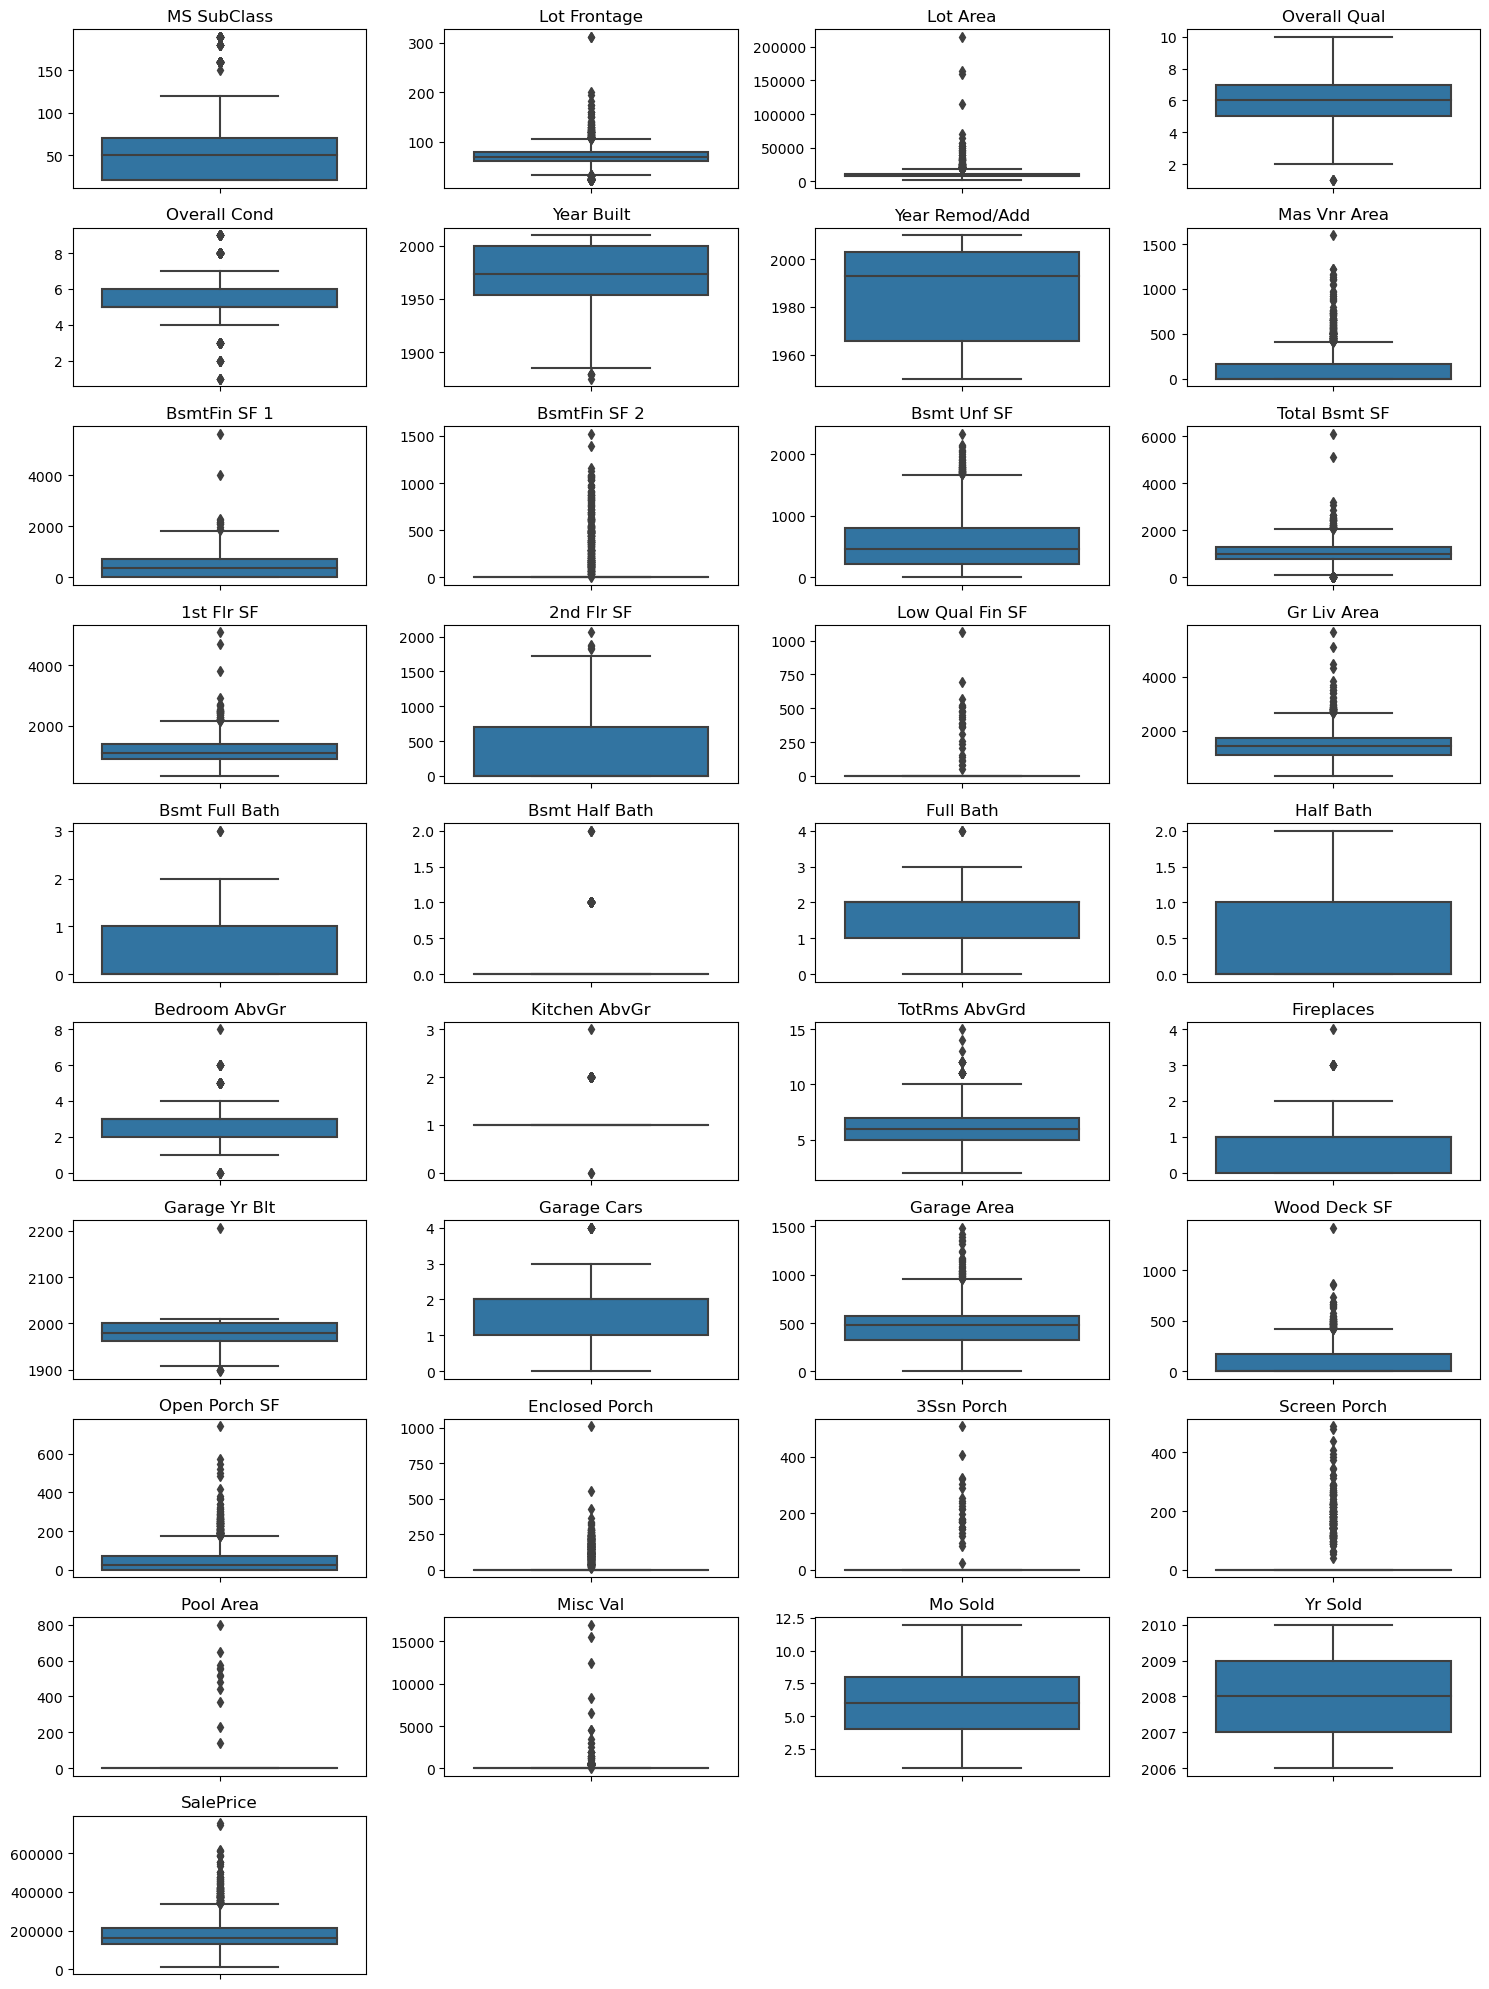

In [56]:
# Identify numerical columns
numerical_cols = train_data_cleaned.select_dtypes(include=np.number).columns.tolist()

# Exclude 'Order' and 'PID' as they are identifiers and not features
numerical_cols = [col for col in numerical_cols if col not in ['Order', 'PID']]

# Create box plots for each numerical column
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(10, 4, i + 1)
    sns.boxplot(y=train_data_cleaned[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [57]:
# Based on the box plots, many numerical features show outliers.
# A simple capping strategy will be applied to features where outliers are evident
# and might disproportionately affect model performance.
# Capping at the 99th percentile seems like a reasonable approach for this dataset.

# Define a function to cap outliers
def cap_outliers(df, column, percentile=0.99):
    upper_limit = df[column].quantile(percentile)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

# Apply capping to numerical columns in the training data
for col in numerical_cols:
    train_data_cleaned = cap_outliers(train_data_cleaned, col)

# Apply the same capping to the test data using limits from the training data
for col in numerical_cols:
    # Calculate upper limit from training data to avoid data leakage
    upper_limit = train_data[col].quantile(0.99)
    test_data_cleaned[col] = np.where(test_data_cleaned[col] > upper_limit, upper_limit, test_data_cleaned[col])


print("Outliers capped at the 99th percentile in numerical columns for both train and test data.")

# Optionally visualize the distributions again after capping
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(10, 4, i + 1)
    sns.boxplot(y=train_data_cleaned[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

KeyError: 'SalePrice'

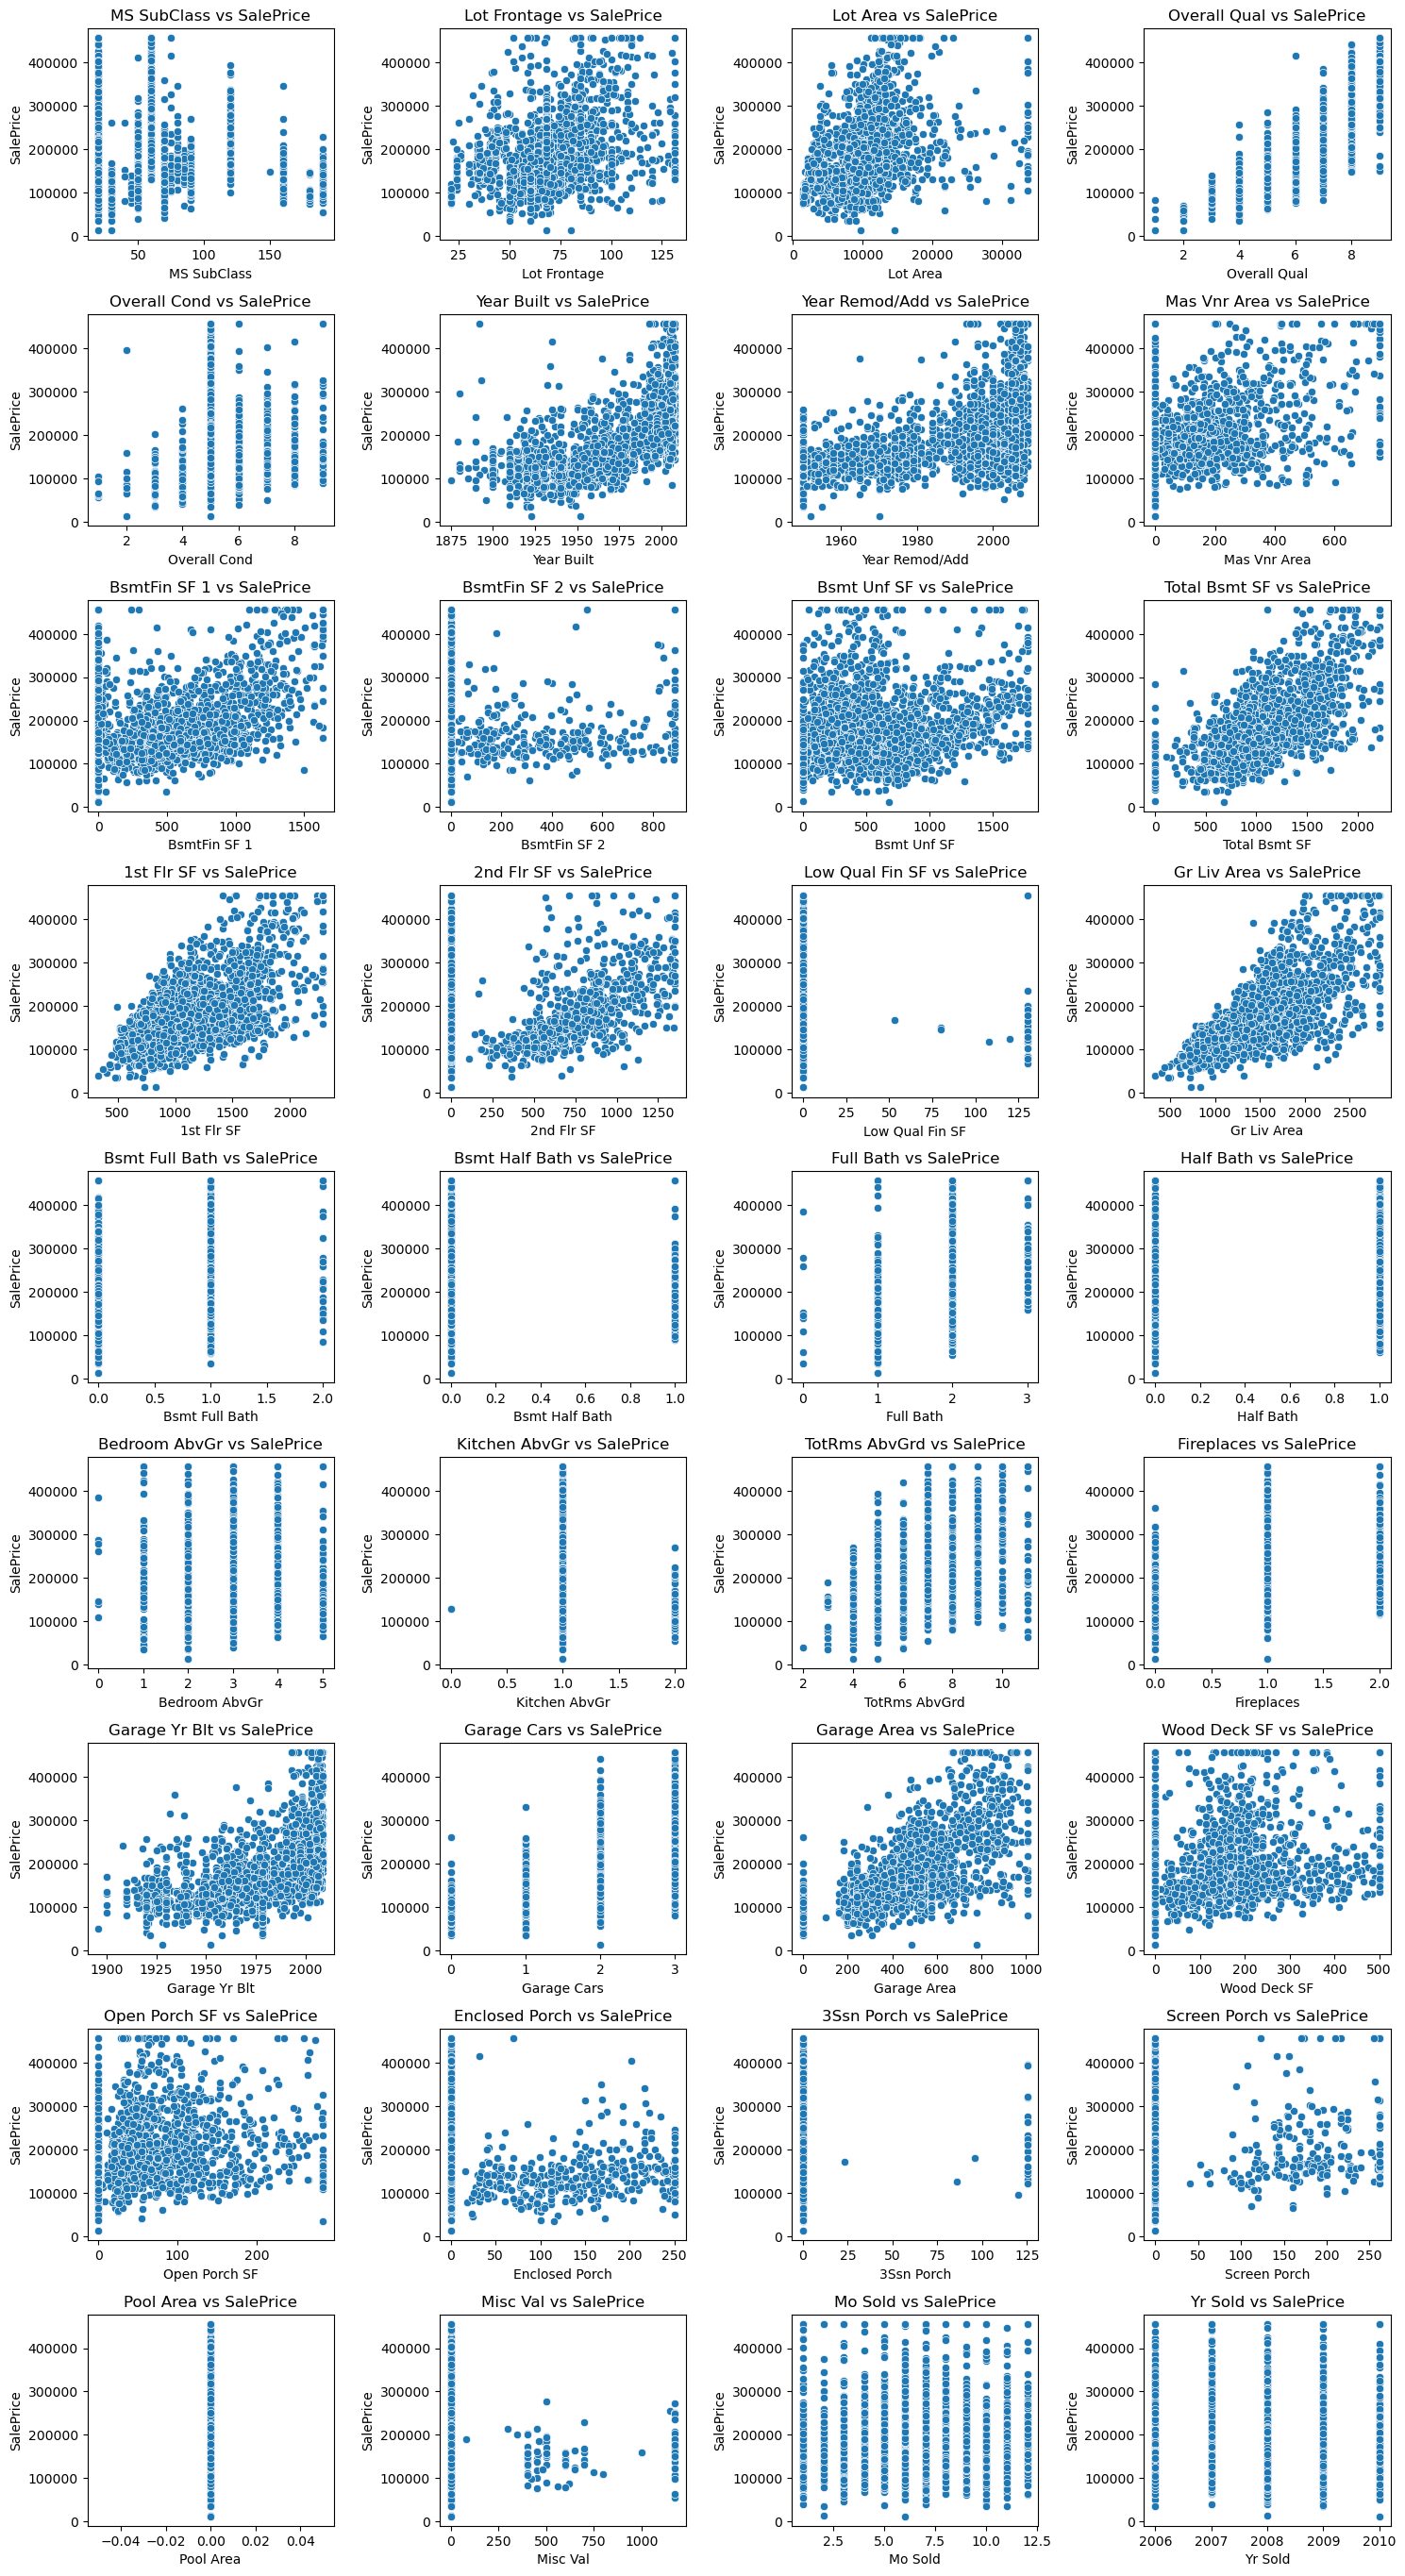

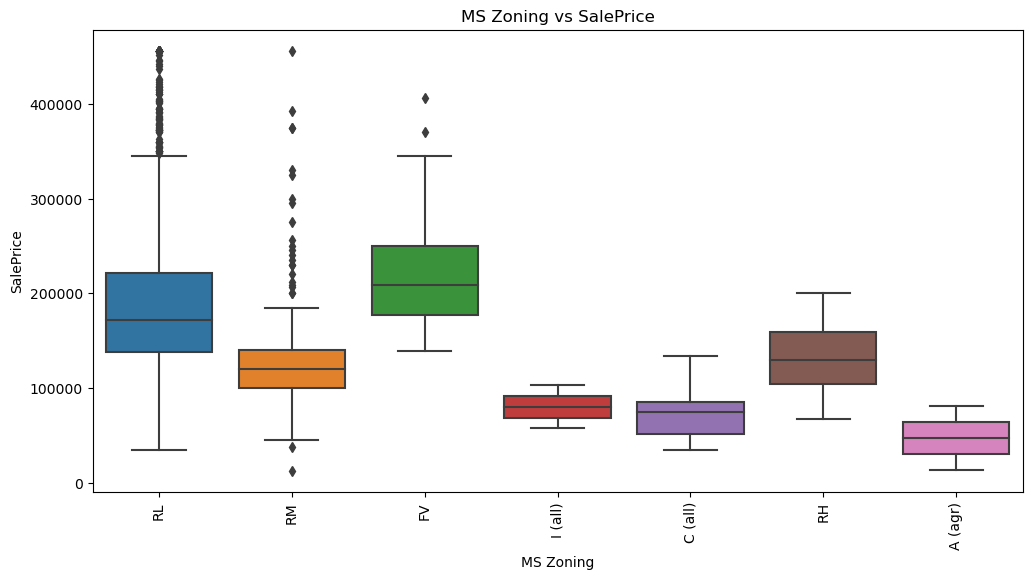

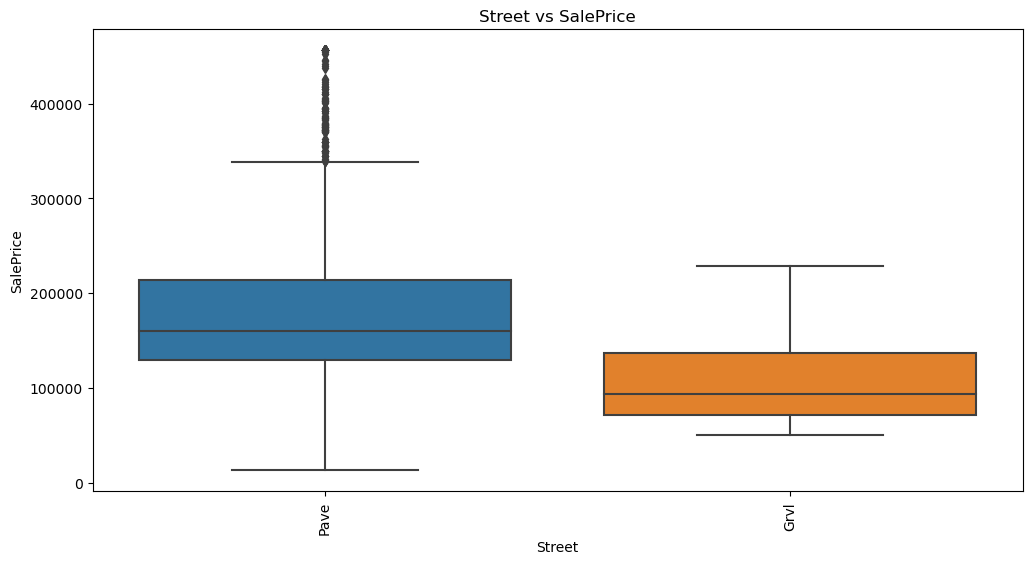

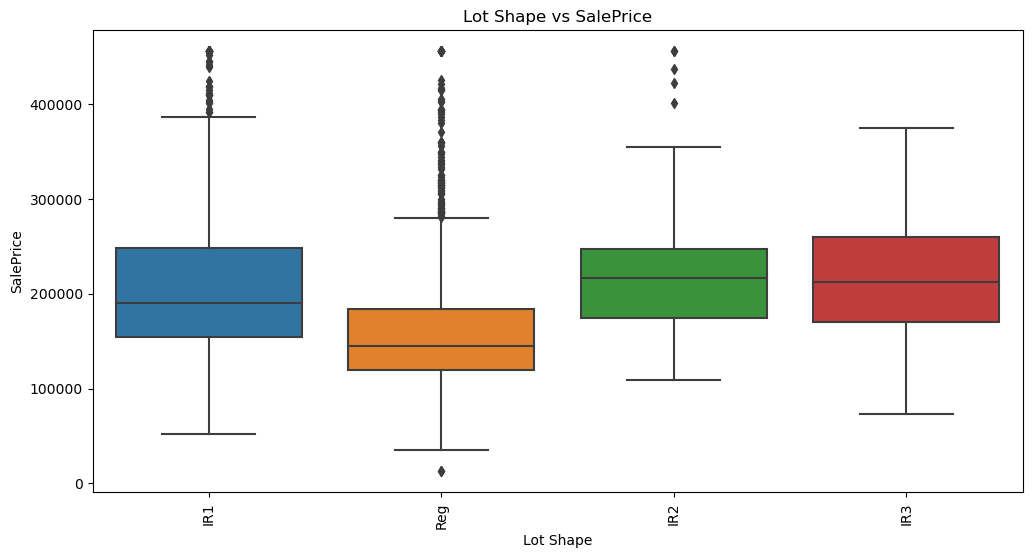

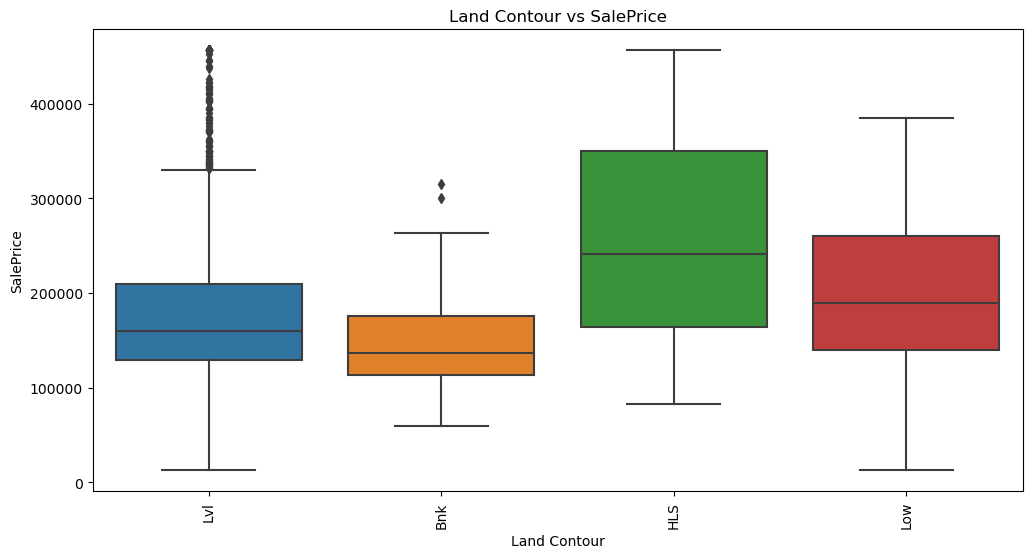

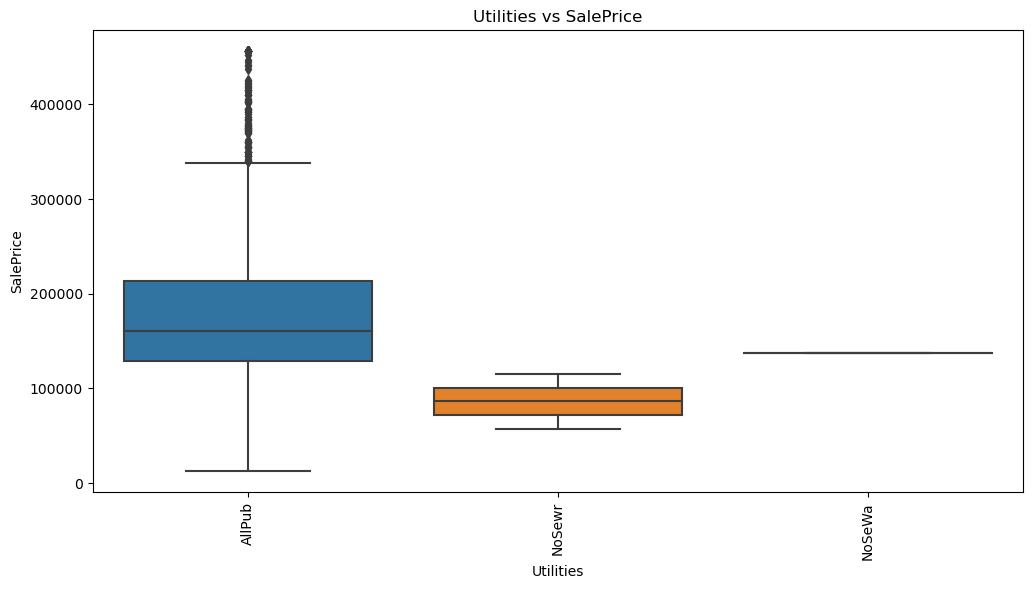

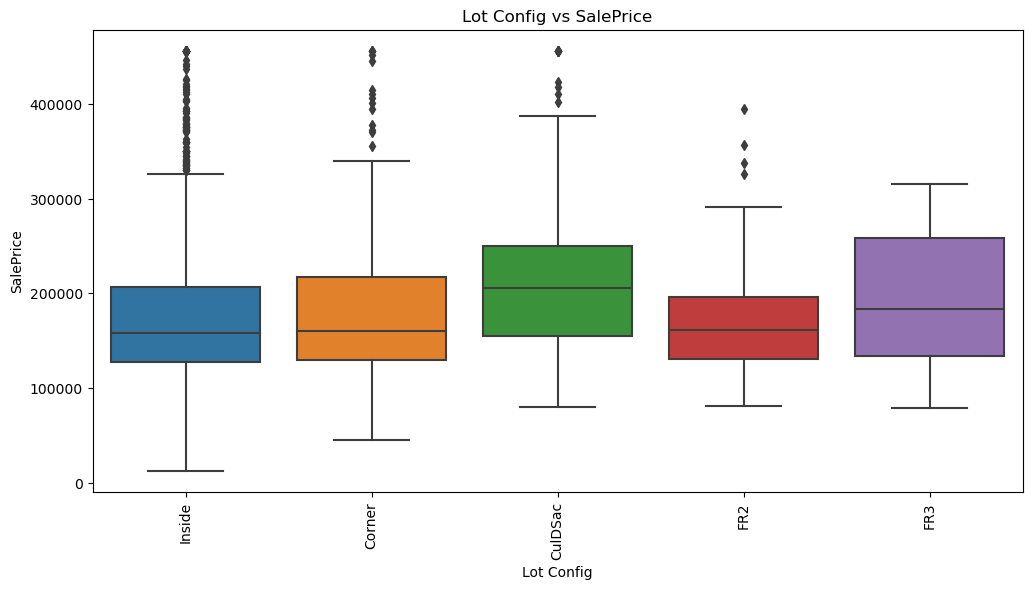

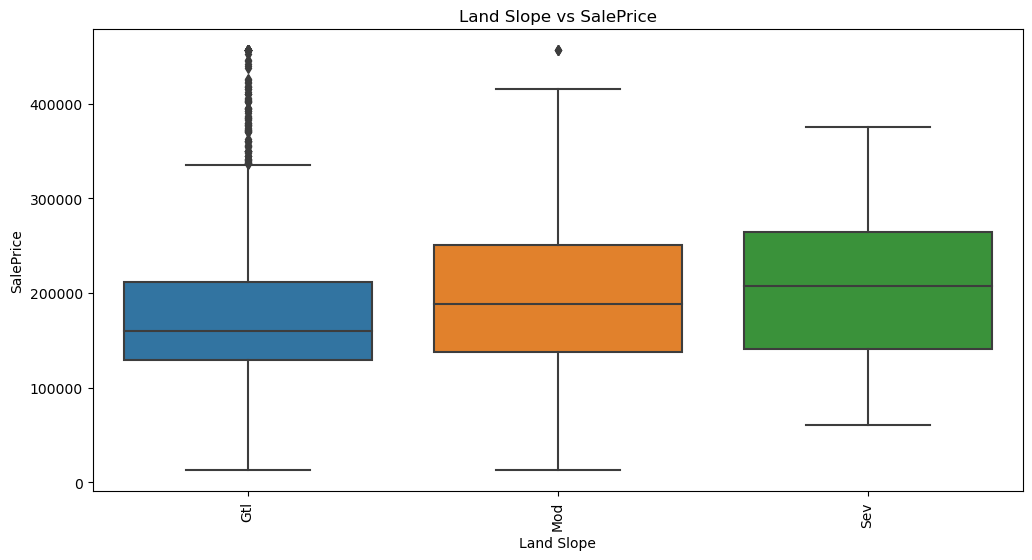

Skipping box plot for Neighborhood due to large number of unique categories (28).


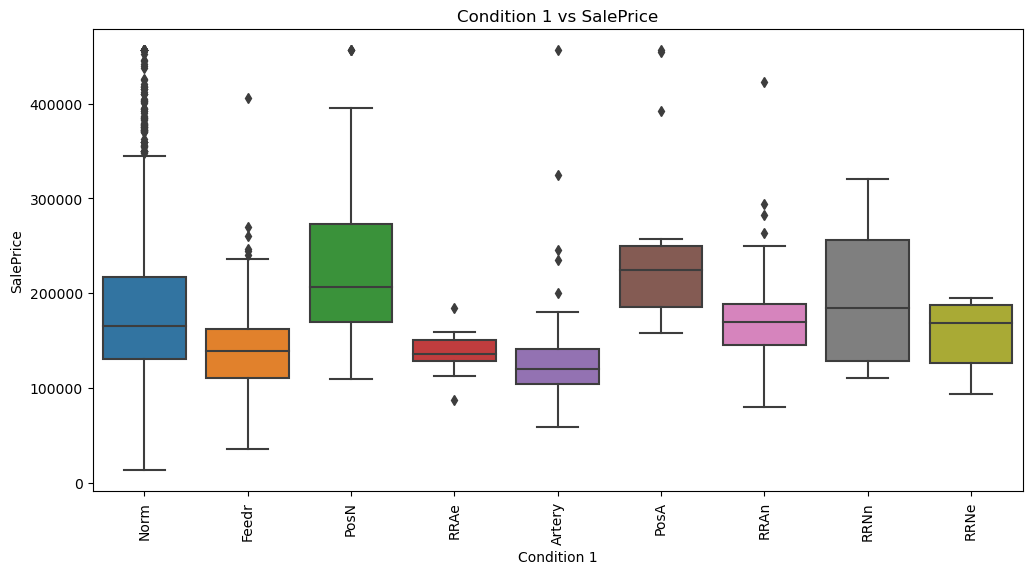

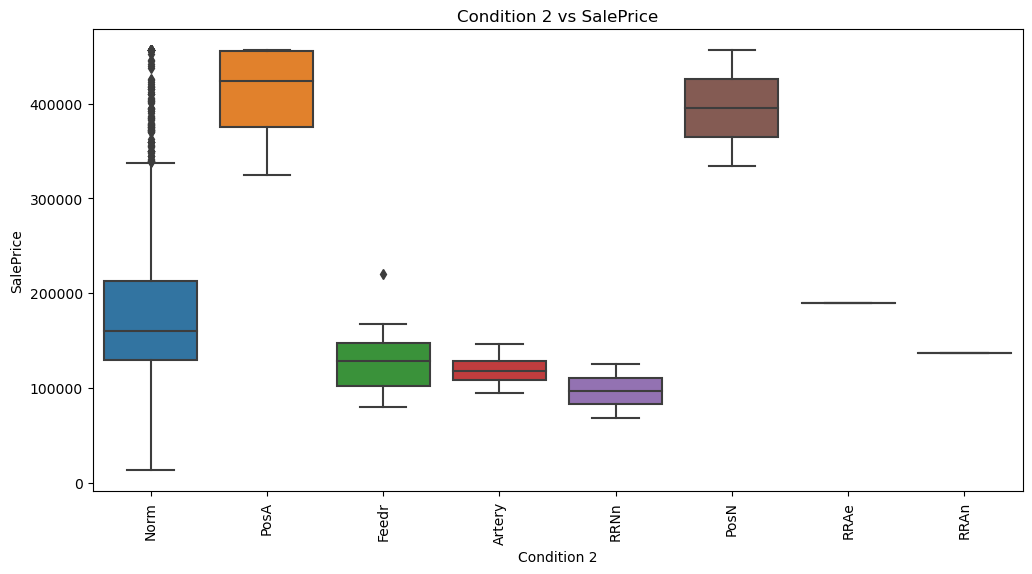

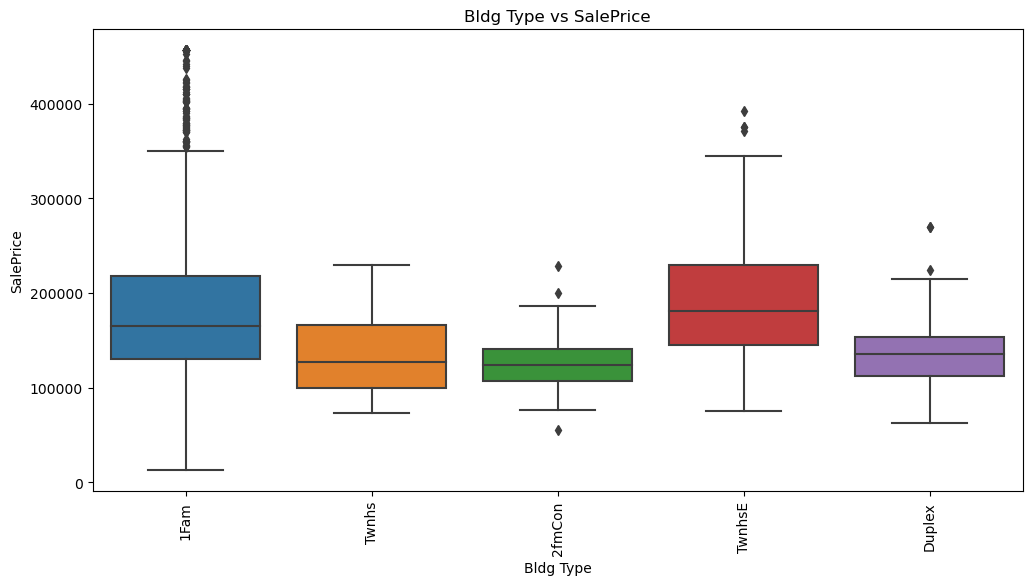

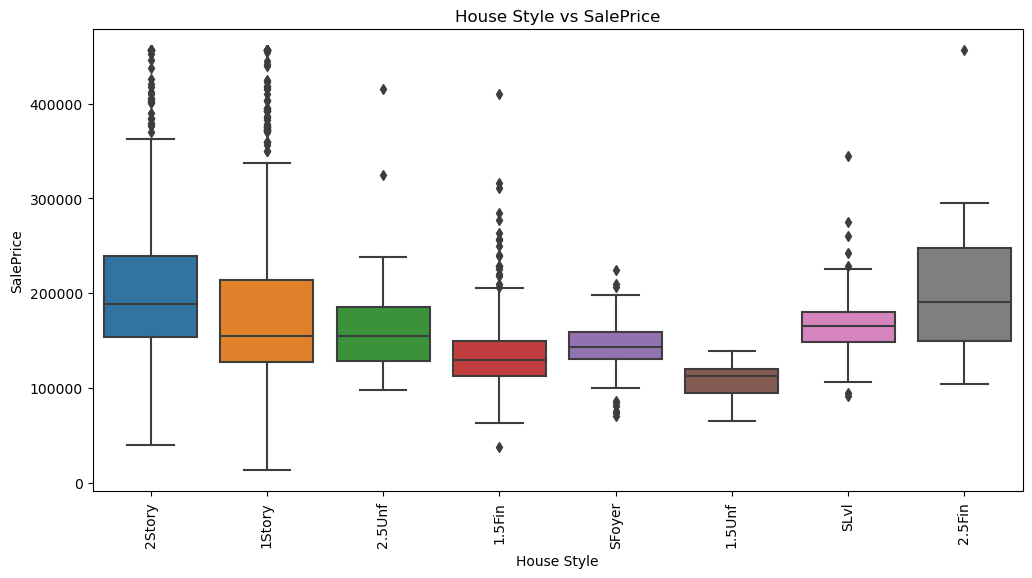

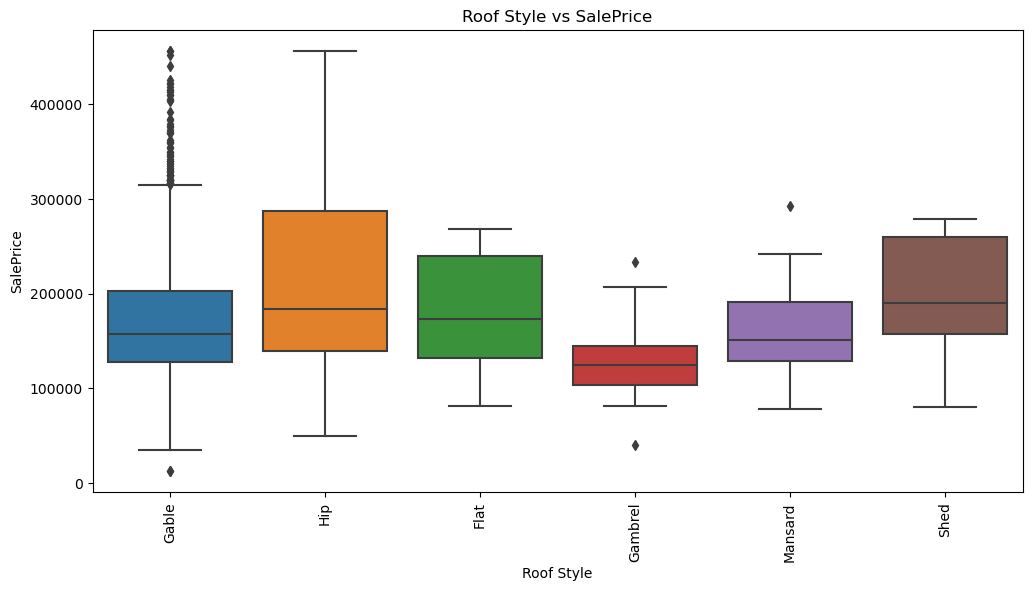

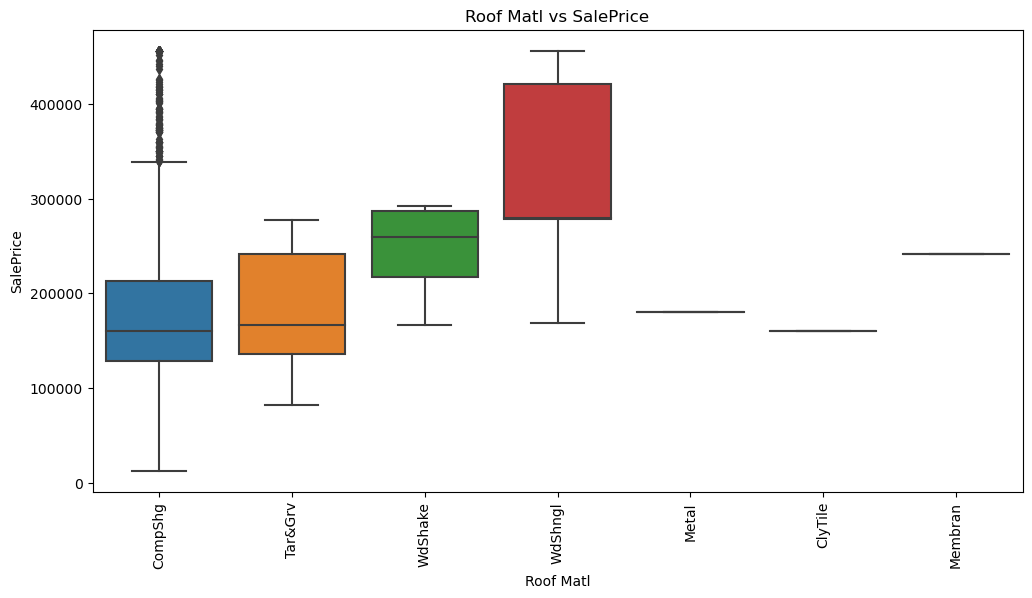

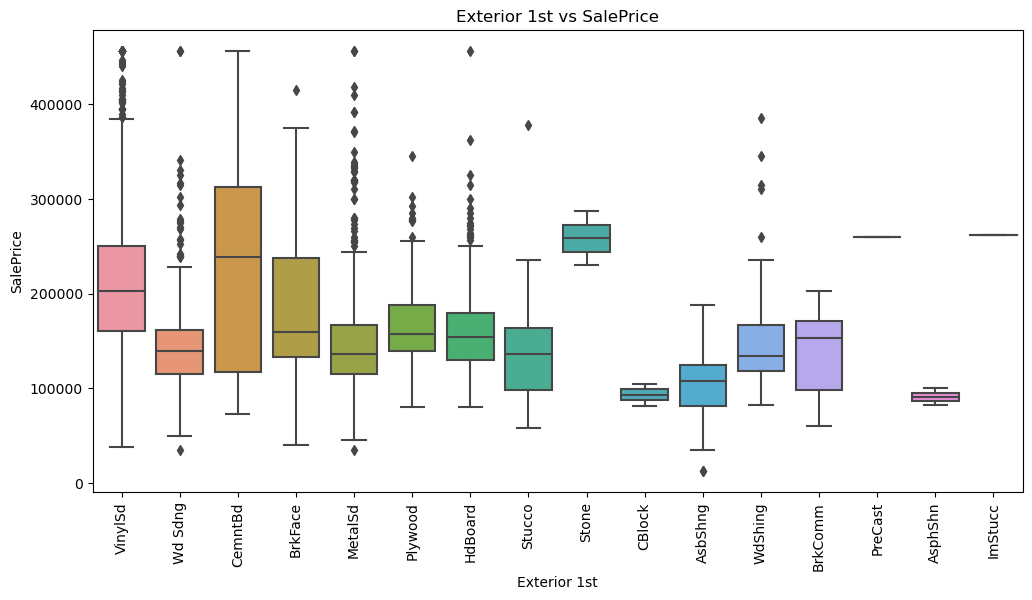

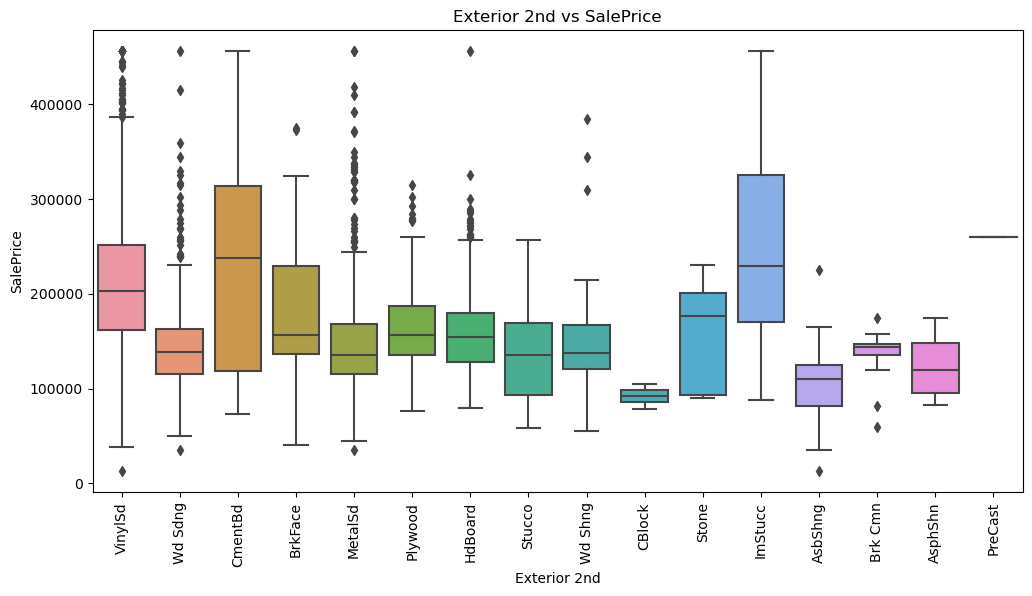

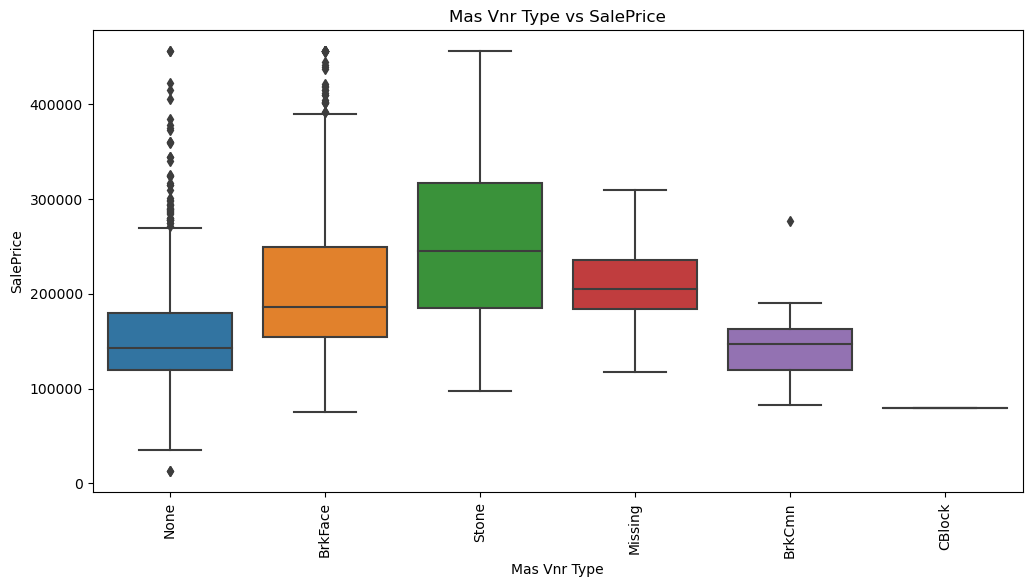

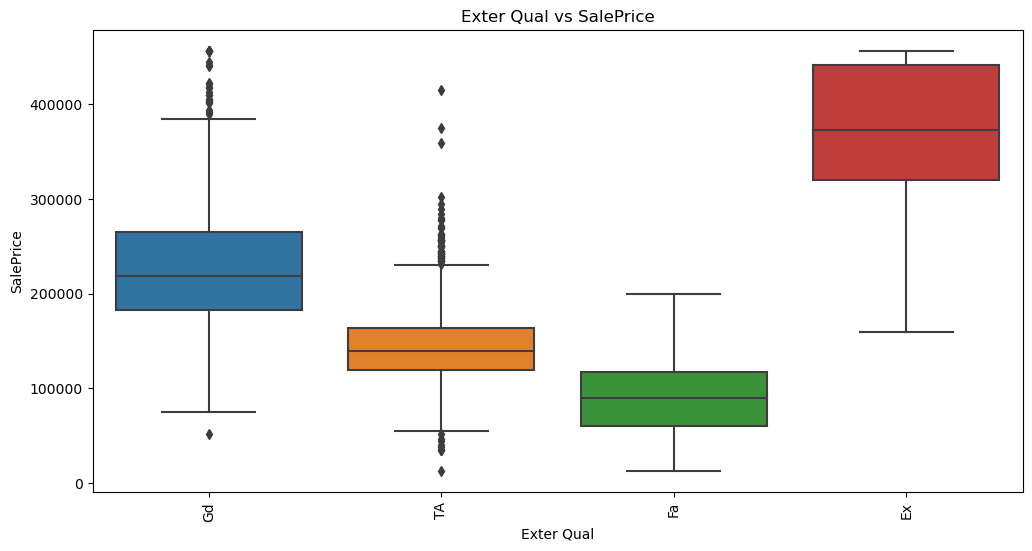

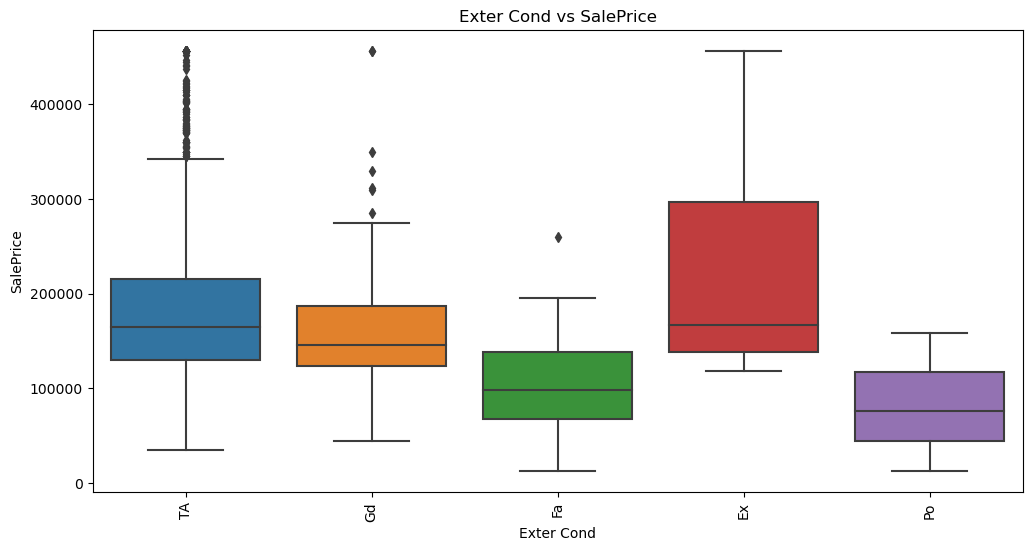

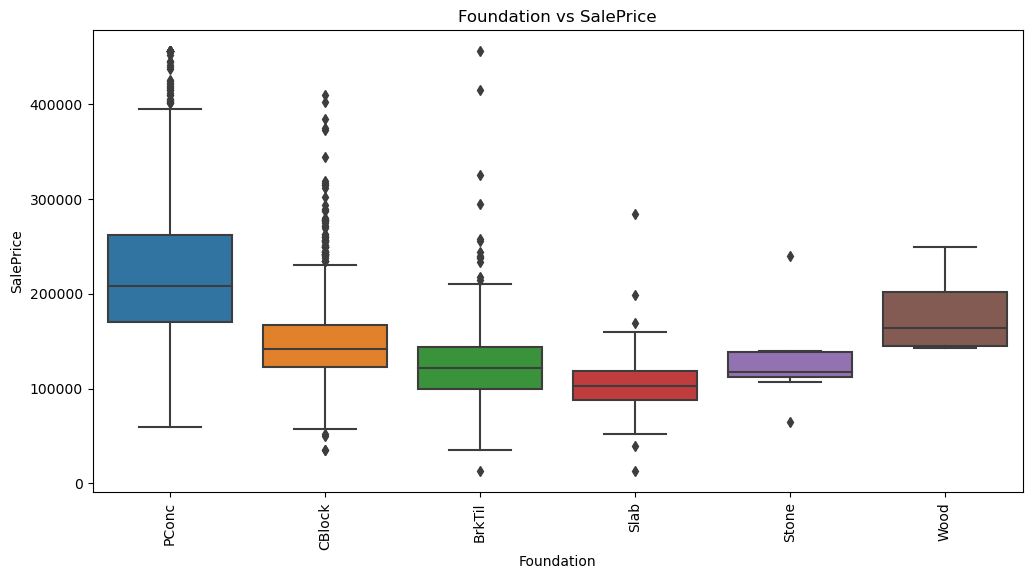

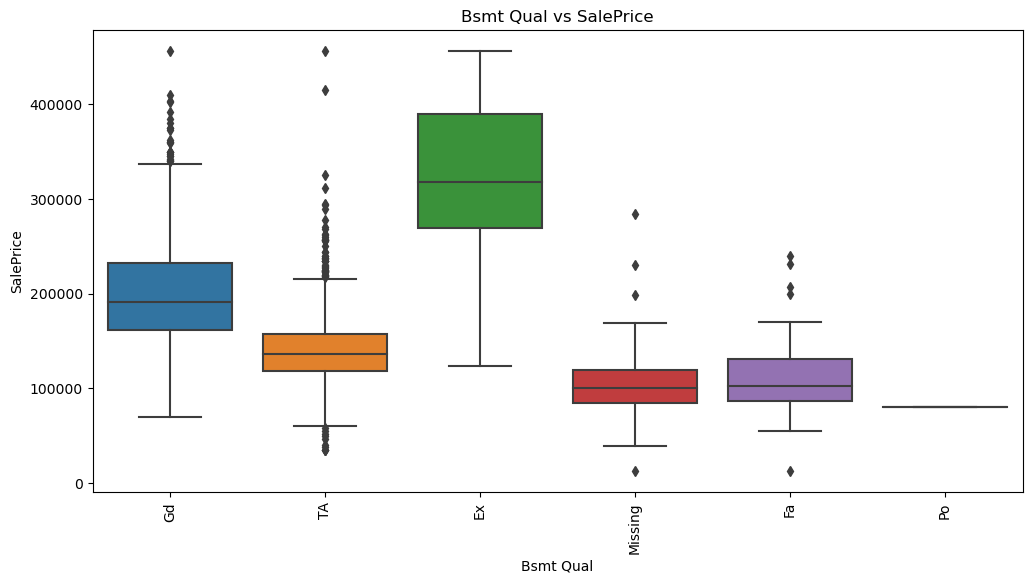

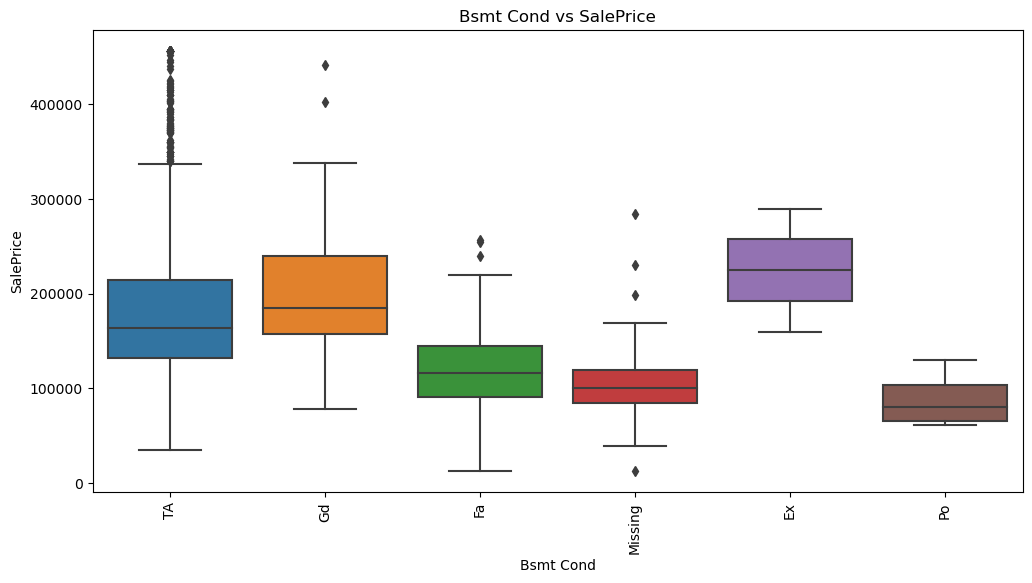

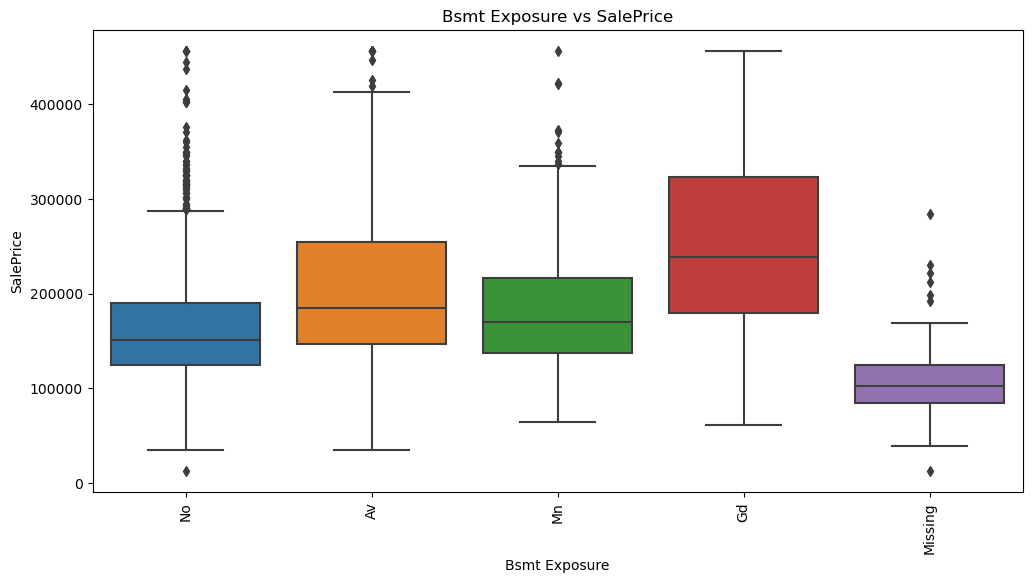

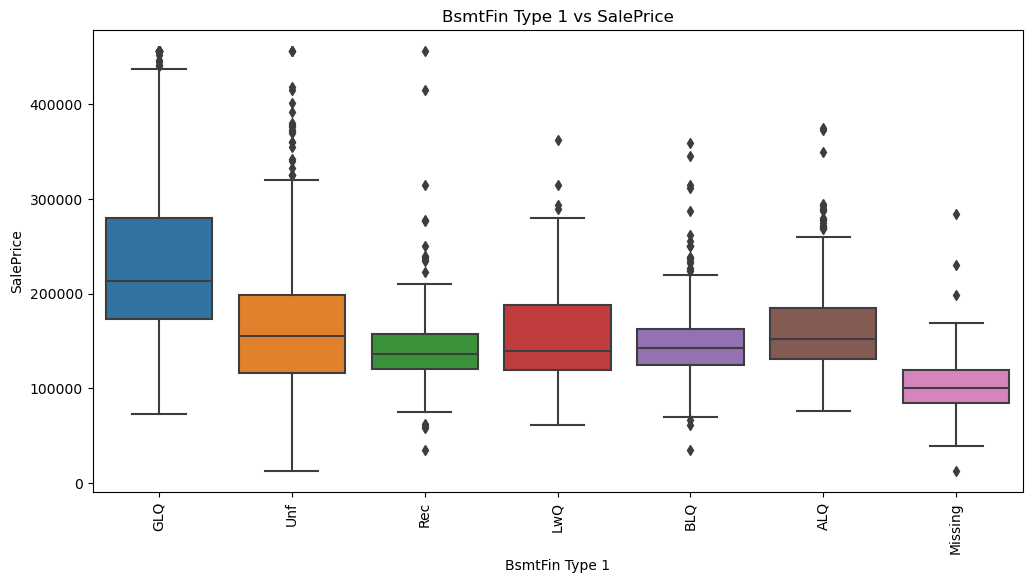

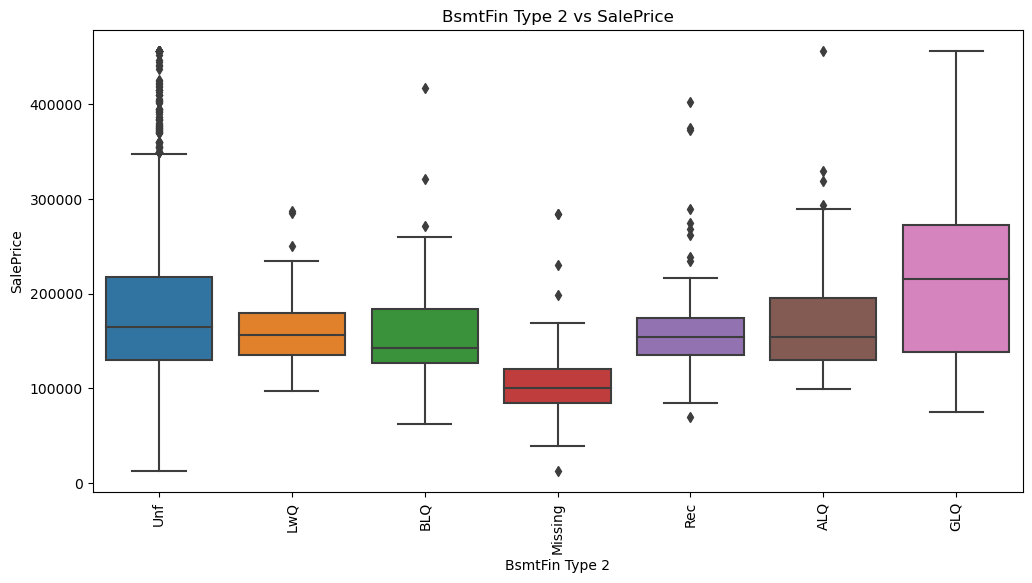

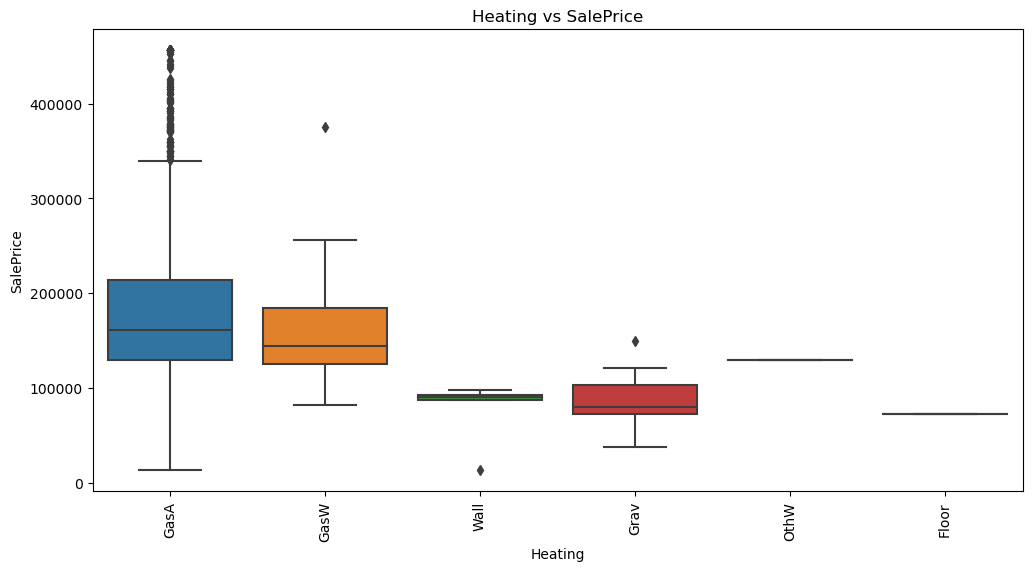

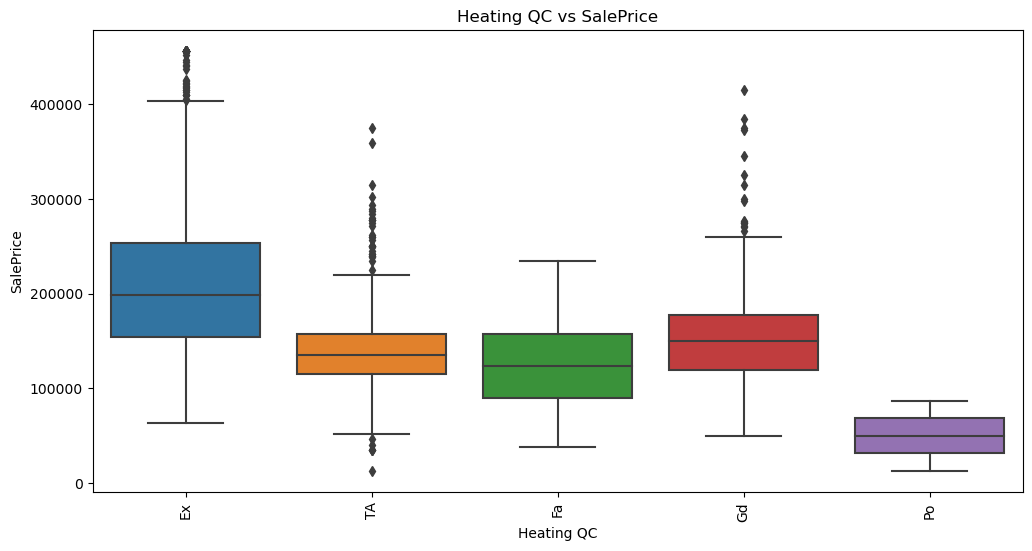

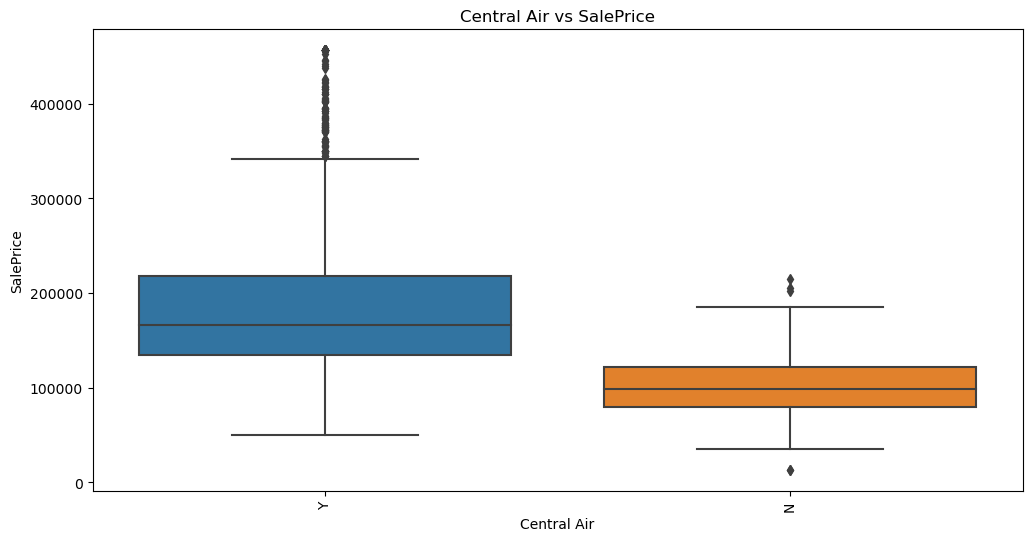

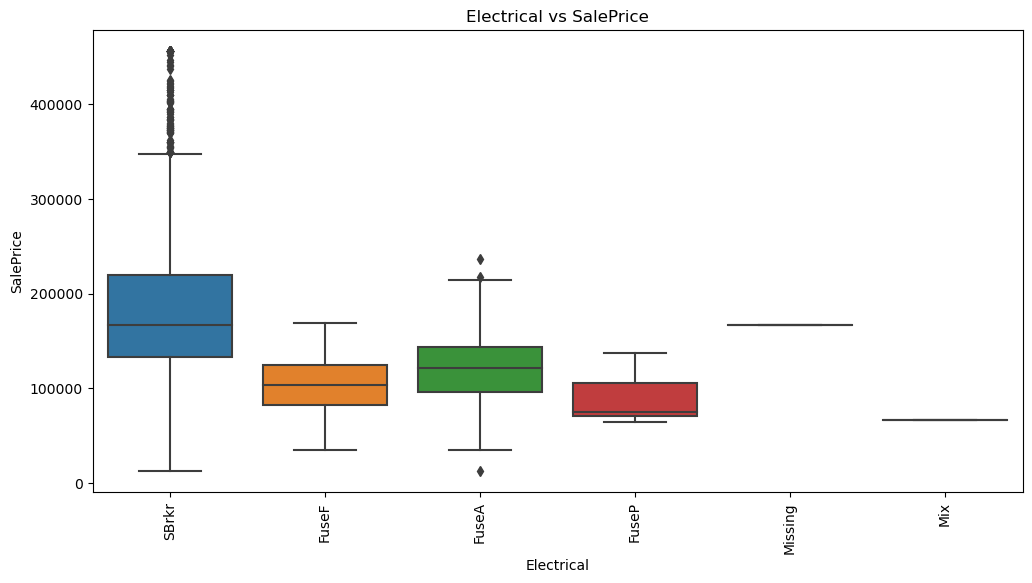

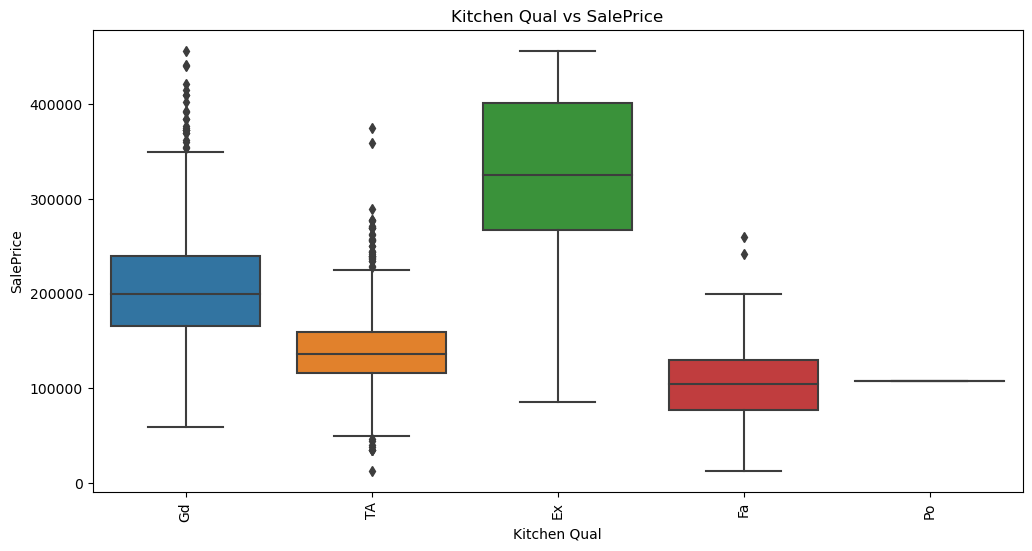

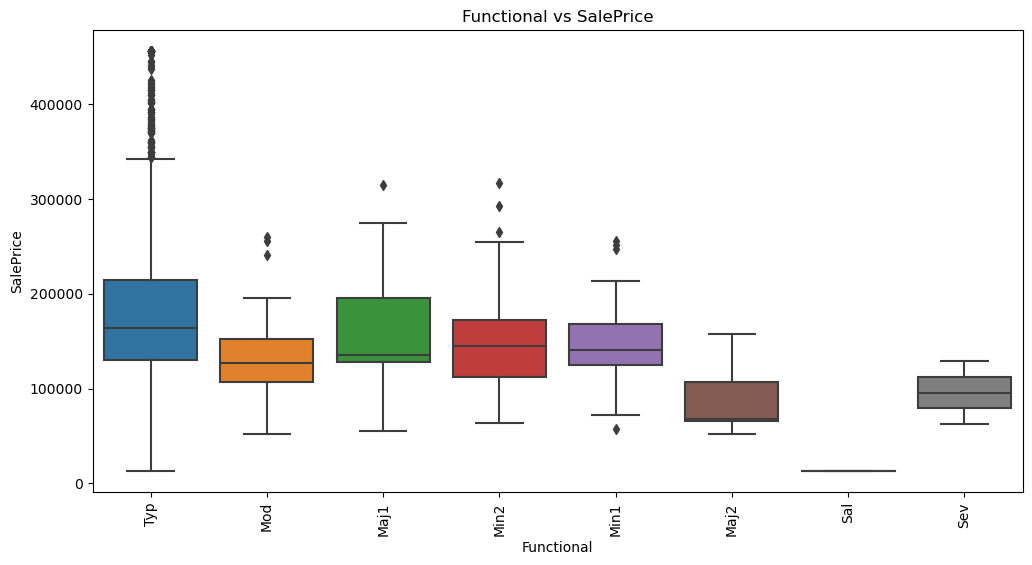

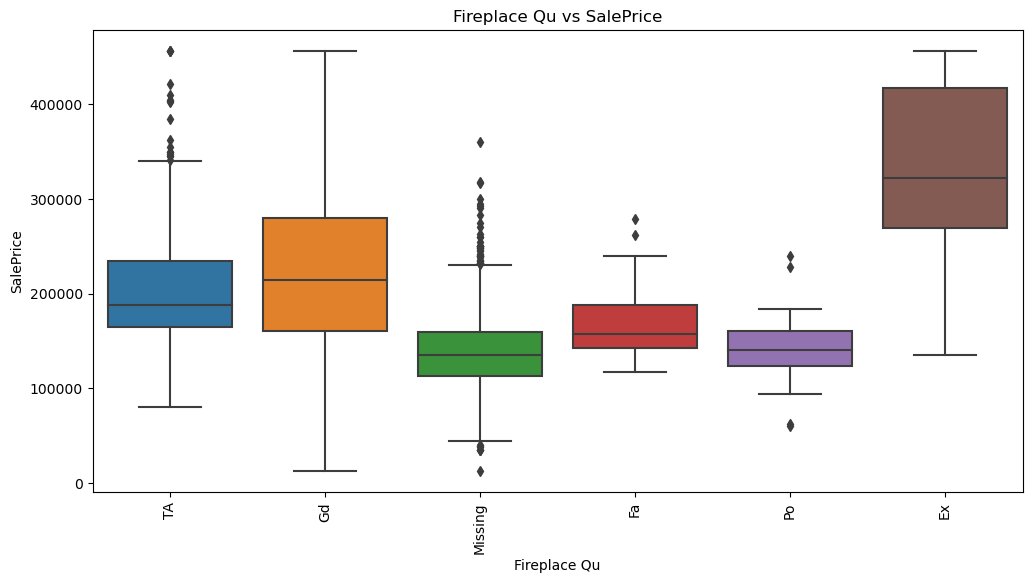

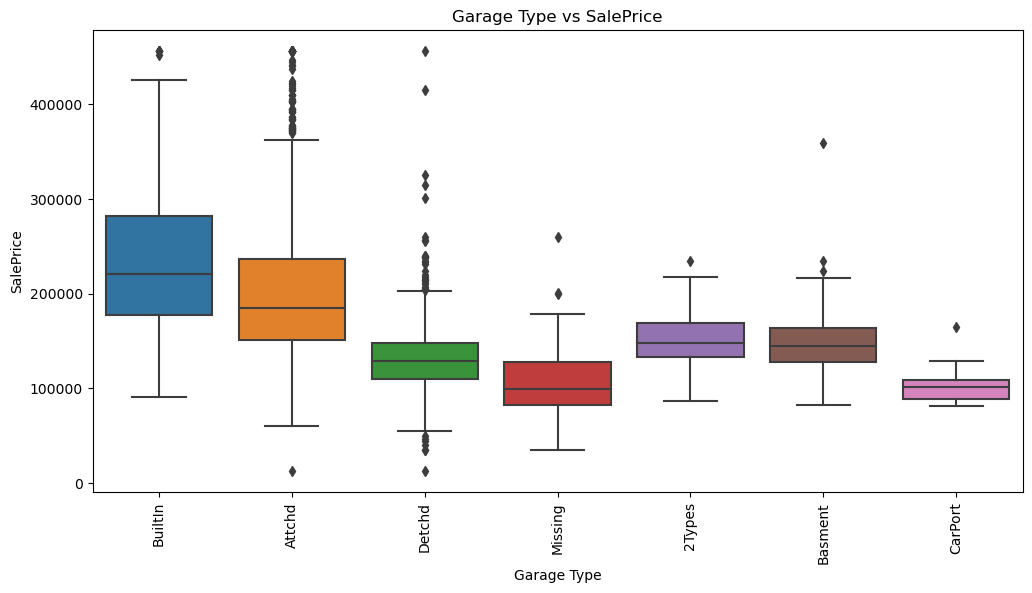

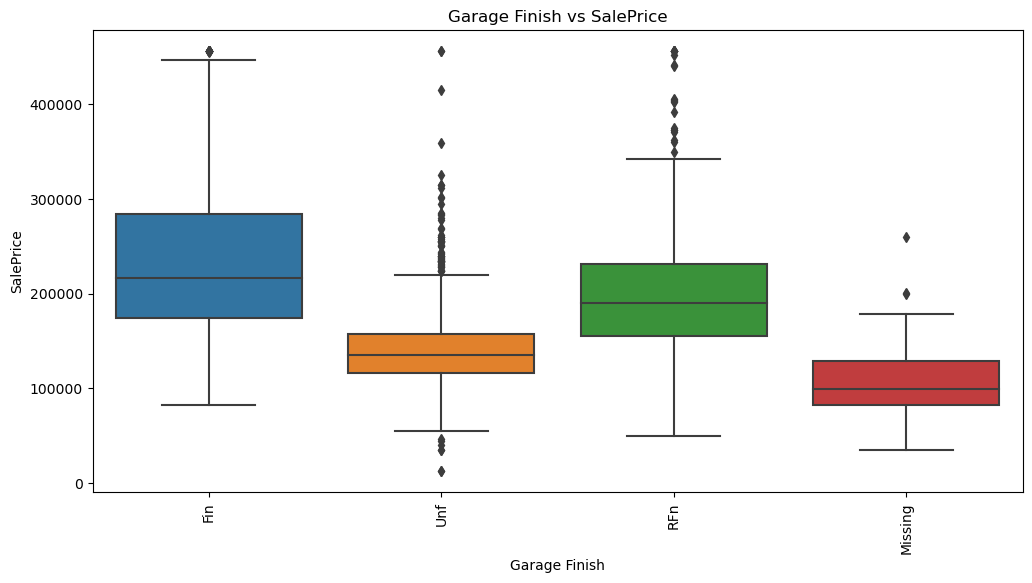

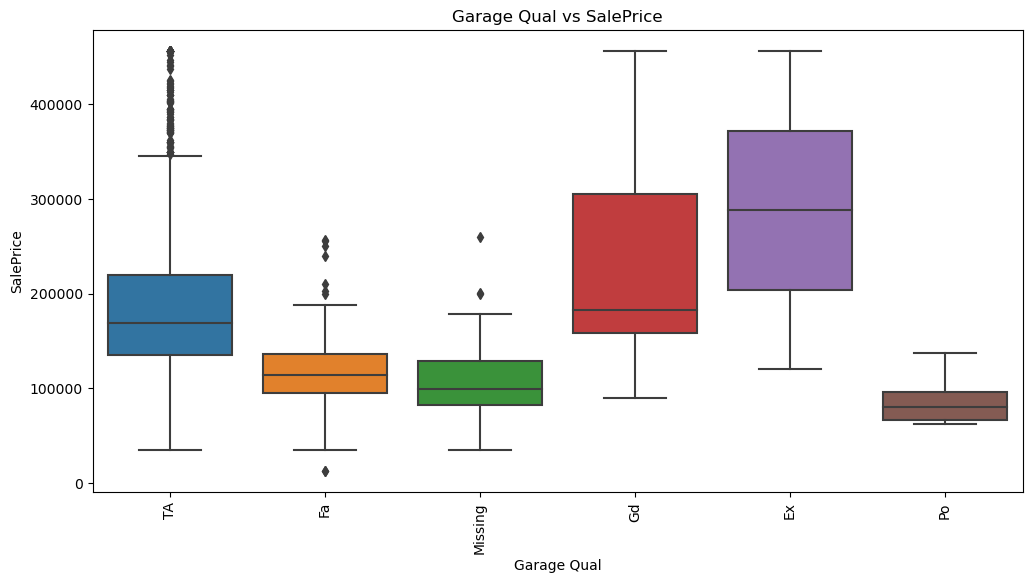

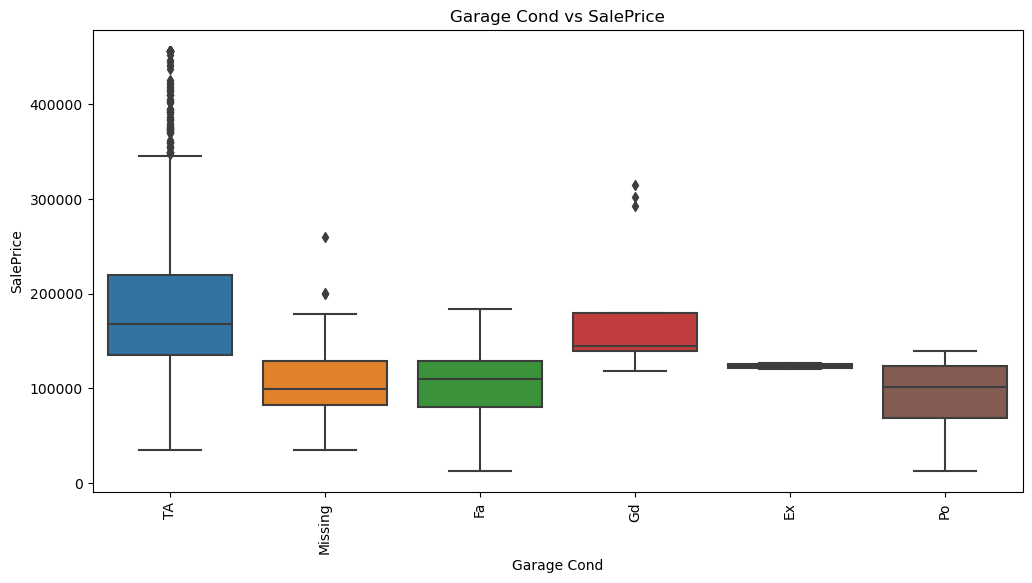

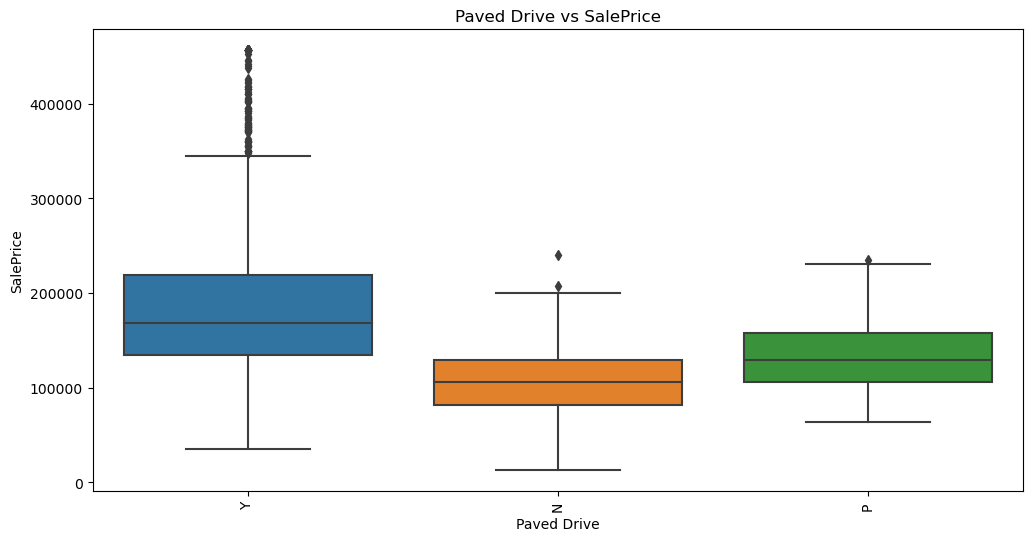

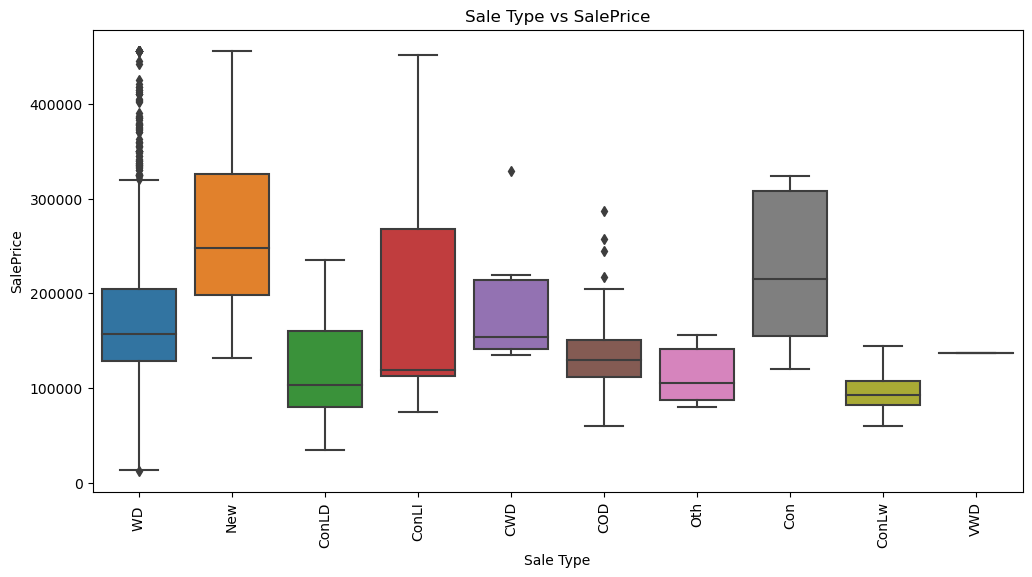

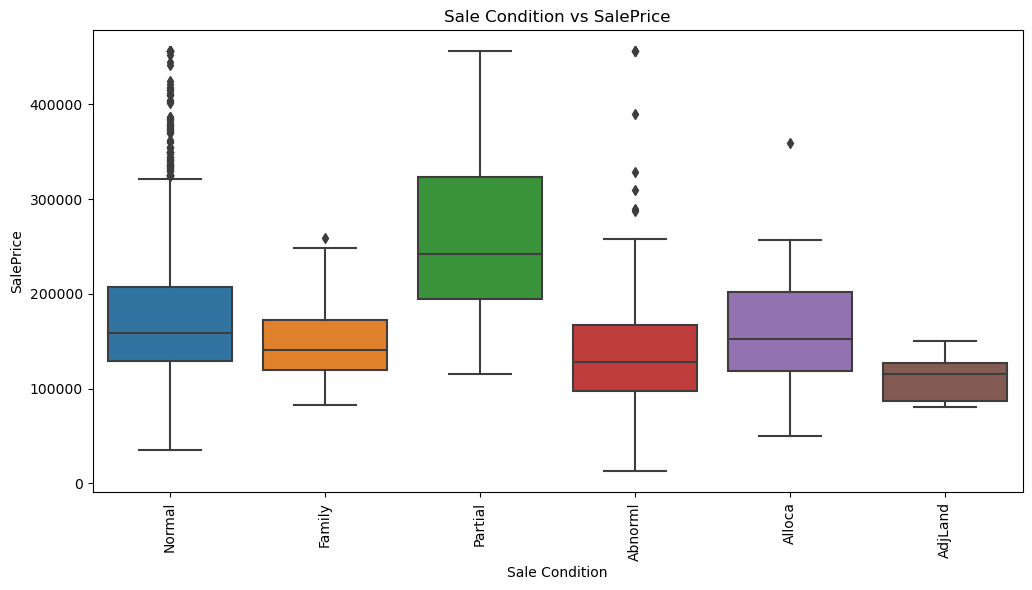

In [41]:
# Identify numerical columns excluding 'Order', 'PID', and 'SalePrice'
numerical_cols = train_data_cleaned.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Order', 'PID', 'SalePrice']]

# Create scatter plots for each numerical column against SalePrice
plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot(10, 4, i + 1)
    sns.scatterplot(x=train_data_cleaned[col], y=train_data_cleaned['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

# Identify categorical columns excluding 'Order' and 'PID'
categorical_cols = train_data_cleaned.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Order', 'PID']]

# Create box plots for each categorical column against SalePrice
# Limit the number of categories for better visualization
for col in categorical_cols:
    if train_data_cleaned[col].nunique() < 20: # Limit to columns with less than 20 unique categories
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=train_data_cleaned[col], y=train_data_cleaned['SalePrice'])
        plt.title(f'{col} vs SalePrice')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.xticks(rotation=90)
        plt.show()
    else:
        print(f"Skipping box plot for {col} due to large number of unique categories ({train_data_cleaned[col].nunique()}).")


In [42]:
# Create 'TotalSF' feature by summing relevant area features
area_cols = ['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area']
train_data_cleaned['TotalSF'] = train_data_cleaned[area_cols].sum(axis=1)
test_data_cleaned['TotalSF'] = test_data_cleaned[area_cols].sum(axis=1)

# Create 'Age' feature from 'Yr Sold' and 'Year Built'
train_data_cleaned['Age'] = train_data_cleaned['Yr Sold'] - train_data_cleaned['Year Built']
test_data_cleaned['Age'] = test_data_cleaned['Yr Sold'] - test_data_cleaned['Year Built']

# Create 'YearsSinceRemodel' feature from 'Yr Sold' and 'Year Remod/Add'
train_data_cleaned['YearsSinceRemodel'] = train_data_cleaned['Yr Sold'] - train_data_cleaned['Year Remod/Add']
test_data_cleaned['YearsSinceRemodel'] = test_data_cleaned['Yr Sold'] - test_data_cleaned['Year Remod/Add']


print("Created 'TotalSF', 'Age', and 'YearsSinceRemodel' features in both dataframes.")
display(train_data_cleaned[['TotalSF', 'Age', 'YearsSinceRemodel']].head())
display(test_data_cleaned[['TotalSF', 'Age', 'YearsSinceRemodel']].head())

Created 'TotalSF', 'Age', and 'YearsSinceRemodel' features in both dataframes.


,TotalSF,Age,YearsSinceRemodel
0,4714.0,9.0,9.0
1,2407.0,55.0,55.0
2,2470.0,37.0,37.0
3,4943.0,51.0,51.0
4,4047.0,97.0,57.0


,TotalSF,Age,YearsSinceRemodel
0,4131.0,75.0,57.0
1,3410.0,15.0,15.0
2,4893.0,0.0,0.0
3,3408.0,47.0,5.0
4,3280.0,110.0,60.0


In [49]:
# Identify numerical and categorical features, excluding identifiers
numerical_features = x_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = x_train.select_dtypes(include='object').columns.tolist()

# Exclude 'Order' and 'PID' from feature lists
numerical_features = [col for col in numerical_features if col not in ['Order', 'PID']]
categorical_features = [col for col in categorical_features if col not in ['Order', 'PID']]

# Apply One-Hot Encoding to categorical features
x_train_categorical = pd.get_dummies(X_train[categorical_features], dummy_na=False)
test_data_categorical = pd.get_dummies(test_data_cleaned[categorical_features], dummy_na=False)

# Align columns - crucial for consistent feature sets
x_train_categorical, test_data_categorical = x_train_categorical.align(test_data_categorical, join='inner', axis=1, fill_value=0)


# Apply Standard Scaling to numerical features
scaler = StandardScaler()
x_train_numerical_scaled = scaler.fit_transform(x_train[numerical_features])
test_data_numerical_scaled = scaler.transform(test_data_cleaned[numerical_features])

# Convert scaled numerical arrays back to DataFrames
x_train_numerical_scaled = pd.DataFrame(x_train_numerical_scaled, columns=numerical_features, index=x_train.index)
test_data_numerical_scaled = pd.DataFrame(test_data_numerical_scaled, columns=numerical_features, index=test_data_cleaned.index)

# Concatenate the processed numerical and categorical features
x_train_processed = pd.concat([x_train_numerical_scaled, x_train_categorical], axis=1)
test_data_processed = pd.concat([test_data_numerical_scaled, test_data_categorical], axis=1)

print("Data preprocessing complete. Final shapes:")
print(f"Processed training data (x_train_processed): {x_train_processed.shape}")
print(f"Processed test data (test_data_processed): {test_data_processed.shape}")

NameError: name 'x_train' is not defined